<a href="https://colab.research.google.com/github/Stamby22/DSCZ9_final_project/blob/main/Copy_of_Project_SDA_Butterflies_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SDA Butterflies classification


*   download data
*   gathering requirements
*   data visualization
*   data processing




## About Dataset

We use the dataset https://www.kaggle.com/datasets/chris565/butterflies-austria-20/code


This is the butterflies images Dataset.In this dataset there are 20 different species of butterflies living in Austria.

The dataset consits of over 7000 butterflies and every class consists of 300-500 species.

This Dataset consists of folder as butterflies and species csv file.

The butterflies folder further contains two folder: Train folder and val folder.

The Train and Val Folder further contains several folders of images.

There are 20 Number of files in Training Folder and 20 Number of Files in the Validation Folder.

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf

#from tensorflow.keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import to_categorical
#from keras.regularizers import l1, l2

from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [2]:
from PIL import Image

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.applications import EfficientNetB3, EfficientNetB4
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Load data

### From Google Drive

In [1]:
# propojit svůj Disk Google
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Spustit pouze poprvé, poté již rozbalená složka na disku existuje a je k dispozici !!
#!unzip /content/drive/MyDrive/Datasets/Butterflies_Austria_5_20.zip -d /content/Datasets
#!unzip /content/drive/MyDrive/Datasets/Butterflies_Austria_7000.zip -d /content/Datasets

In [6]:
dataset_dir = "/content/Datasets/"
#dataset_dir = "/content/Datasets/Butterflies_Austria_5_20/"
train_dir = os.path.join(dataset_dir, "butterflies", "train")
val_dir = os.path.join(dataset_dir, "butterflies", "val")

# Define the path to your dataset directory
# dataset_path = '/kaggle/input/butterflies-austria-20'

### From Local Directory

In [5]:
current_working_directory = os.getcwd()
print(current_working_directory)

c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV


In [6]:
os.listdir()

['.git',
 '.gitignore',
 '.venv',
 'Butterflies_Austria',
 'Butterflies_Austria_P',
 'Butterflies_Austria_SDA_final_project.ipynb',
 'Models',
 'README.md',
 'requirements.txt',
 'TODO.txt']

In [20]:
dataset_dir_raw = "Butterflies_Austria"
dataset_dir_raw = os.path.join(current_working_directory, dataset_dir_raw)

In [21]:
os.listdir(dataset_dir_raw)

['butterflies', 'species.csv', 'species_cname.csv']

In [22]:
train_dir_raw = os.path.join(dataset_dir_raw, "butterflies", "train")
val_dir_raw = os.path.join(dataset_dir_raw, "butterflies", "val")

In [23]:
dataset_dir = "Butterflies_Austria_P"
dataset_dir = os.path.join(current_working_directory, dataset_dir)

In [24]:
os.listdir(dataset_dir)

['butterflies', 'species.csv', 'species_cname.csv']

In [25]:
train_dir = os.path.join(dataset_dir, "butterflies", "train")
val_dir = os.path.join(dataset_dir, "butterflies", "val")

## Zobrazení Species.csv

In [26]:
df = pd.read_csv(os.path.join(dataset_dir, "species.csv"))
df.head()

num abk      gname                   latin
0    1  ad    Admiral        Vanessa Atalanta
1    2  ap     Apollo       Parnassius Apollo
2    3  af     Aurora  Anthocharis Cardamines
3    4  bl  Blaeuling              Lycaenidae
4    5  cf   C-Falter       Polygonia C-album

In [27]:
dfcz = pd.read_csv(os.path.join(dataset_dir, "species_cname.csv"), encoding="cp1250")
dfcz#.head()

num  abk             gname                   latin  \
0     1   ad           Admiral        Vanessa Atalanta   
1     2   ap            Apollo       Parnassius Apollo   
2     3   af            Aurora  Anthocharis Cardamines   
3     4   bl         Blaeuling              Lycaenidae   
4     5   cf          C-Falter       Polygonia C-album   
5     6   df      Distelfalter          Vanessa Cardui   
6     7   po         Postilion        Colias Myrmidone   
7     8   km      Kaisermantel         Argynnis Paphia   
8     9   kf     kleiner Fuchs          Aglais Urticae   
9    10   kw     Kohlweissling            Pieris Rapae   
10   11   oa        Ochsenauge         Maniola Jurtina   
11   12   sb       Schachbrett     Melanargia Galathea   
12   13   sf    Schillerfalter            Apatura Iris   
13   14   ss  Schwalbenschwanz         Papilio Machaon   
14   15  sfa       Segelfalter   Iphiclides Podalirius   
15   16   tf      Tagfauenauge              Inachis Io   
16   17   tm      Trauermantel       Nymphalis Antiopa   
17   18   zf    Zitronenfalter       Gonepteryx Rhamni   
18   19   ol  Osterluzeifalter      Zerynthia Polyxena   
19   20  dfa     Dukatenfalter      Lycaena Virgaureae   

                       cname  
0            Babočka admirál  
1           Jasoň červenooký  
2          Bělásek řeřichový  
3               Modráskovití  
4             Babočka bílé C  
5          Babočka bodláková  
6        Žluťásek barvoměnný  
7    Perleťovec stříbropásek  
8          Babočka kopřivová  
9             Bělásek řepový  
10                Okáč luční  
11            Okáč bojínkový  
12            Batolec duhový  
13        Otakárek fenyklový  
14           Otakárek ovocný  
15          Babočka paví oko  
16           Babočka osiková  
17      Žluťásek řešetlákový  
18  Pestrokřídlec podražcový  
19        Ohniváček celíkový

In [28]:
num_train_files = len(os.listdir(train_dir))
print(f"Number of files in the 'train' folder: {num_train_files}")

num_val_files = len(os.listdir(val_dir))
print(f"Number of files in the 'val' folder: {num_val_files}")

Number of files in the 'train' folder: 20
Number of files in the 'val' folder: 20


In [29]:
# Count images per folder in training data
def count_images_per_folder(data_path):
    folders = os.listdir(data_path)
    folders.sort()
    folder_counts = {}
    for folder in folders:
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):
            num_images = len(os.listdir(folder_path))
            folder_counts[folder] = num_images
    return folder_counts

# Vypíše počet obrázků v jednotlivých složkách train_dir
train_folder_counts = count_images_per_folder(train_dir)
print("Number of images in each folder of Training Data:")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} images, Druh: {dfcz[dfcz['abk'] == folder]['cname'].values[0]}")

Number of images in each folder of Training Data:
ad: 241 images, Druh: Babočka admirál
af: 280 images, Druh: Bělásek řeřichový
ap: 234 images, Druh: Jasoň červenooký
bl: 288 images, Druh: Modráskovití
cf: 286 images, Druh: Babočka bílé C
df: 214 images, Druh: Babočka bodláková
dfa: 157 images, Druh: Ohniváček celíkový
kf: 199 images, Druh: Babočka kopřivová
km: 240 images, Druh: Perleťovec stříbropásek
kw: 241 images, Druh: Bělásek řepový
oa: 278 images, Druh: Okáč luční
ol: 204 images, Druh: Pestrokřídlec podražcový
po: 208 images, Druh: Žluťásek barvoměnný
sb: 257 images, Druh: Okáč bojínkový
sf: 270 images, Druh: Batolec duhový
sfa: 211 images, Druh: Otakárek ovocný
ss: 190 images, Druh: Otakárek fenyklový
tf: 178 images, Druh: Babočka paví oko
tm: 147 images, Druh: Babočka osiková
zf: 151 images, Druh: Žluťásek řešetlákový


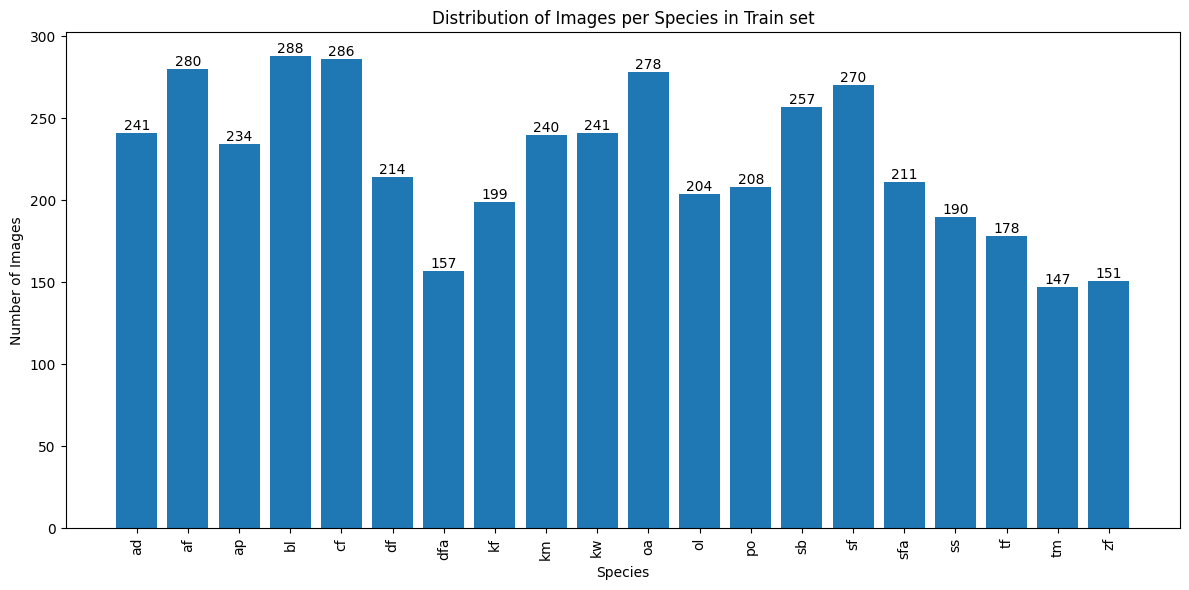

In [30]:
# Barplot of number of images for each species - train set

# Get the counts of images in each folder
train_folder_counts = count_images_per_folder(train_dir)

# Extract folder names and counts
folders = list(train_folder_counts.keys())
counts = list(train_folder_counts.values())

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(folders, counts)
plt.xlabel("Species")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Species in Train set")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [31]:
# Vypíše počet obrázků v jednotlivých složkách val_dir
train_folder_counts = count_images_per_folder(val_dir)
print("\nNumber of images in each folder of Validation Data:")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} images, Druh: {dfcz[dfcz['abk'] == folder]['cname'].values[0]}")


Number of images in each folder of Validation Data:
ad: 12 images, Druh: Babočka admirál
af: 17 images, Druh: Bělásek řeřichový
ap: 13 images, Druh: Jasoň červenooký
bl: 16 images, Druh: Modráskovití
cf: 13 images, Druh: Babočka bílé C
df: 17 images, Druh: Babočka bodláková
dfa: 13 images, Druh: Ohniváček celíkový
kf: 15 images, Druh: Babočka kopřivová
km: 13 images, Druh: Perleťovec stříbropásek
kw: 11 images, Druh: Bělásek řepový
oa: 13 images, Druh: Okáč luční
ol: 22 images, Druh: Pestrokřídlec podražcový
po: 12 images, Druh: Žluťásek barvoměnný
sb: 13 images, Druh: Okáč bojínkový
sf: 11 images, Druh: Batolec duhový
sfa: 14 images, Druh: Otakárek ovocný
ss: 9 images, Druh: Otakárek fenyklový
tf: 15 images, Druh: Babočka paví oko
tm: 13 images, Druh: Babočka osiková
zf: 15 images, Druh: Žluťásek řešetlákový


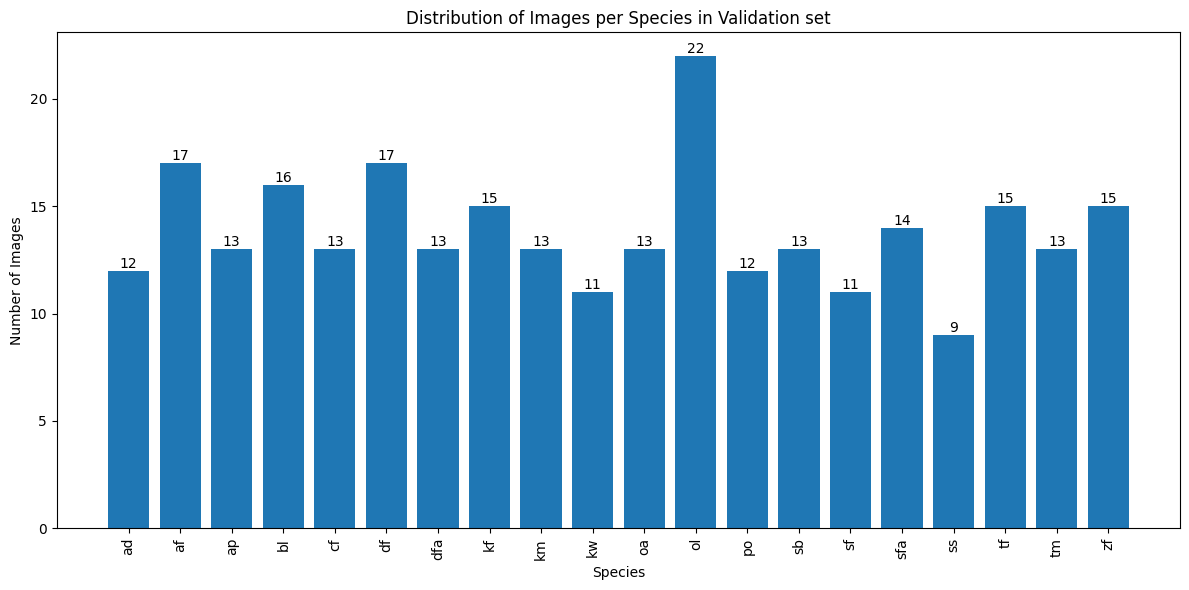

In [32]:
# Barplot of number of images for each species - validation set

# Get the counts of images in each folder
train_folder_counts = count_images_per_folder(val_dir)

# Extract folder names and counts
folders = list(train_folder_counts.keys())
counts = list(train_folder_counts.values())

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(folders, counts)
plt.xlabel("Species")
plt.ylabel("Number of Images")
plt.title("Distribution of Images per Species in Validation set")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Show images

In [33]:
# Functions definitons

In [34]:
def display_image(image_path, title=""):
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

def display_images_with_titles(image_paths, titles):
    fig, ax = plt.subplots(5, 5, figsize=(30, 25))
    for i, image_path in enumerate(image_paths):
        row = i // 5
        col = i % 5
        image = Image.open(image_path)
        image = image.resize(size=(140, 140))
        ax[row, col].imshow(image)
        ax[row, col].axis('off')
        ax[row, col].set_title(titles[i])
    plt.tight_layout()
    plt.show()

def display_images_with_titles_II(image_paths, titles):
    """
    Displays multiple images with titles in a single plot.

    Args:
        image_paths: A list of paths to the images.
        titles: A list of titles corresponding to the images.
    """
    num_images = len(image_paths)
    fig, axes = plt.subplots(4, 5, figsize=(15, 15))  # Adjust figsize as needed

    for i in range(num_images):
        row = i // 5
        col = i % 5
        image = plt.imread(image_paths[i])
        axes[row, col].imshow(image)
        axes[row, col].set_title(titles[i])
        axes[row, col].axis('off')  # Remove axis labels

    plt.tight_layout()
    plt.show()

def display_images_with_titles_III(image_paths, titles):
    fig, ax = plt.subplots(2, 5, figsize=(20, 10))
    for i, image_path in enumerate(image_paths):
        row = i // 5
        col = i % 5
        image = Image.open(image_path)
        ax[row, col].imshow(image)
        ax[row, col].axis('off')
        ax[row, col].set_title(titles[i])
    plt.tight_layout()
    plt.show()

In [ ]:
# Zobrazení prvních 10 obrázků prvního druhu

train_folders = os.listdir(train_dir)
train_folders.sort()
train_images_displayed = 0
train_image_paths = []
train_image_titles = []
for folder in train_folders:
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    for i, image_file in enumerate(image_files):
        if train_images_displayed < 10:
            image_path = os.path.join(folder_path, image_file)
            train_image_paths.append(image_path)
            train_image_titles.append(f"Folder: {folder}")
            train_images_displayed += 1
        else:
            break

print(f"Number of images displayed: prvních {train_images_displayed}")
display_images_with_titles_III(train_image_paths, train_image_titles)

In [ ]:
# Zobrazení prvních 25 obrázků všech druhů

train_folders = os.listdir(train_dir)
train_folders.sort()
train_images_displayed = 0
train_image_paths = []
train_image_titles = []
for folder in train_folders:
    train_image_paths = []
    train_image_titles = []
    train_images_displayed = 0
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    image_files.sort()
    for i, image_file in enumerate(image_files[:25]):
        image_path = os.path.join(folder_path, image_file)
        train_image_paths.append(image_path)
        train_image_titles.append(f"{folder}-{image_file}")
        train_images_displayed += 1

    print(f"Number of images displayed: prvních {train_images_displayed}")
    display_images_with_titles(train_image_paths, train_image_titles)


 Images of each Folder of Training Data:


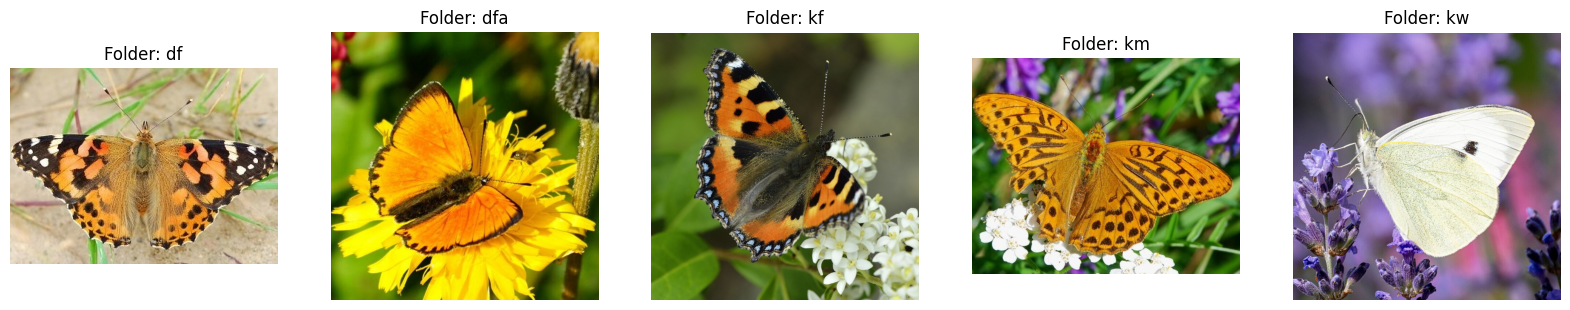


 Images of each folder of Validation Data:


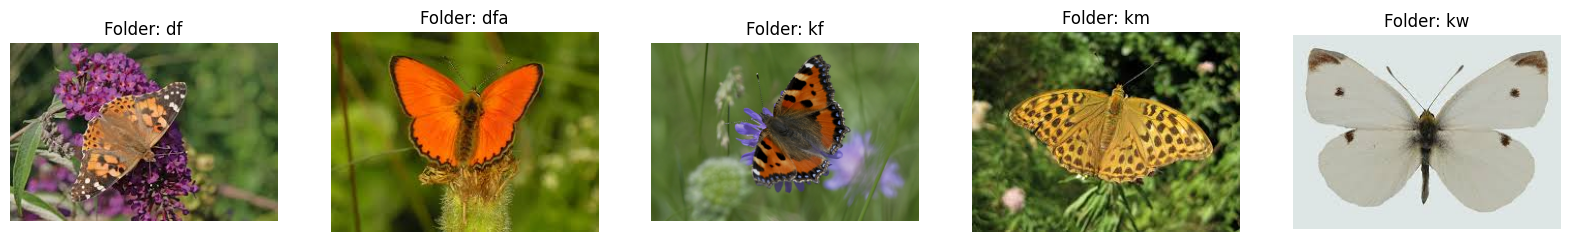

In [35]:
# Function to print bold headings
def print_bold_heading(heading):
    print(f"\n \033[1m{heading}:\033[0m")

# Display 10 images from each folder in the train folder
print_bold_heading("Images of each Folder of Training Data")
train_folders = os.listdir(train_dir)
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i, folder in enumerate(train_folders[:10]):
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    for j, image_file in enumerate(image_files[:1]):
        image_path = os.path.join(folder_path, image_file)
        ax[i%5].imshow(Image.open(image_path))
        ax[i%5].axis('off')
        ax[i%5].set_title(f"Folder: {folder}")
plt.show()

# Display 10 images from each folder in the validation folder
print_bold_heading("Images of each folder of Validation Data")
val_folders = os.listdir(val_dir)
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i, folder in enumerate(val_folders[:10]):
    folder_path = os.path.join(val_dir, folder)
    image_files = os.listdir(folder_path)
    for j, image_file in enumerate(image_files[:1]):
        image_path = os.path.join(folder_path, image_file)
        ax[i%5].imshow(Image.open(image_path))
        ax[i%5].axis('off')
        ax[i%5].set_title(f"Folder: {folder}")
plt.show()

Number of Species: 20


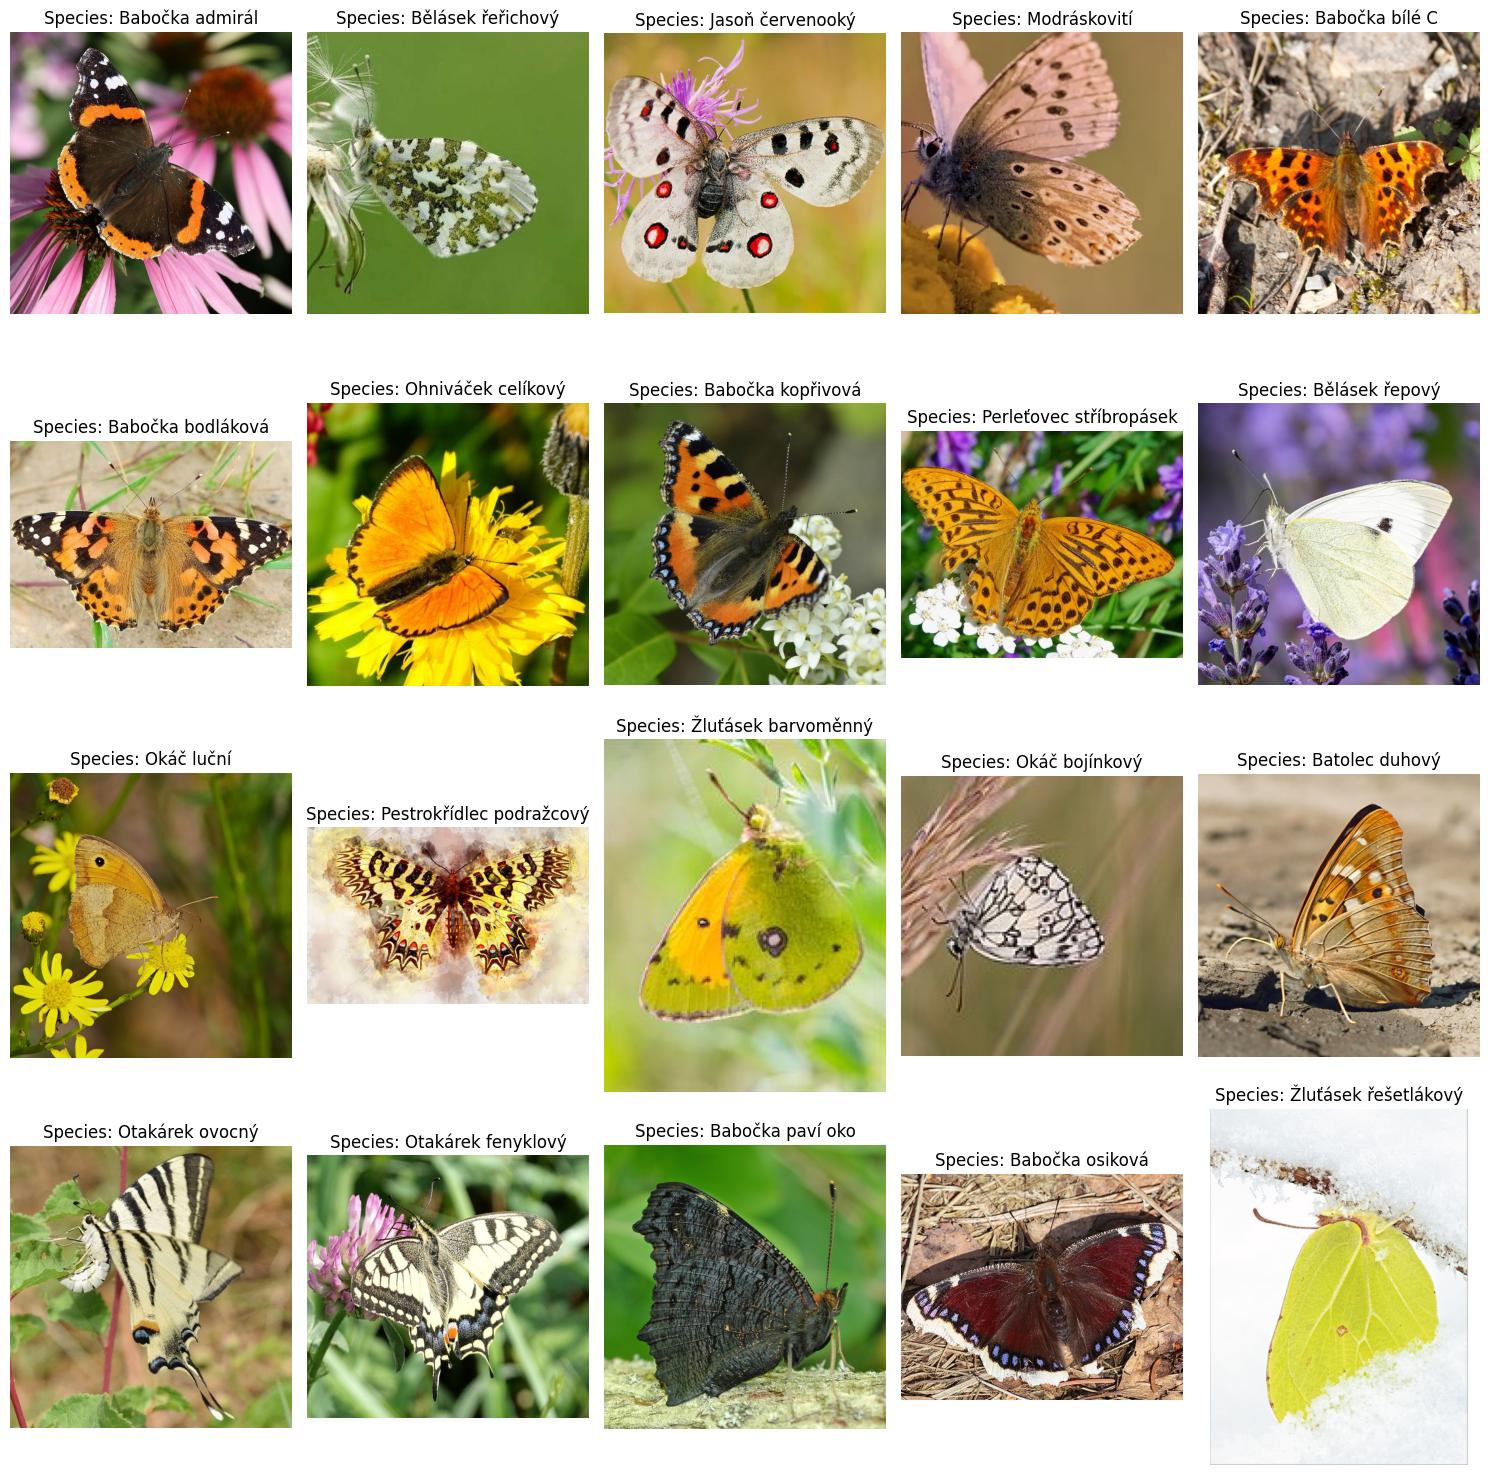

In [36]:
# Print first image from each folder in train_folders with Species name

train_folders = os.listdir(train_dir)
train_folders.sort()
train_images_displayed = 0
train_image_paths = []
train_image_titles = []
for folder in train_folders:
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    if image_files:
        image_path = os.path.join(folder_path, image_files[0])
        train_image_paths.append(image_path)
        train_image_titles.append(f"Species: {dfcz[dfcz['abk'] == folder]['cname'].values[0]}")
        train_images_displayed += 1

print(f"Number of Species: {train_images_displayed}")
display_images_with_titles_II(train_image_paths, train_image_titles)

## Models

In [58]:
def plot_history(history):
    # plot the Loss curve(s)
    plt.figure(figsize=[5,3])

    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)

    plt.legend(['Training loss', 'Validation Loss'],fontsize=12)
    plt.xlabel('Epochs',fontsize=16)
    plt.xticks(range(epochs))
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()

    # plot the Accuracy curve(s)
    plt.figure(figsize=[5,3])

    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)

    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=12)
    plt.xlabel('Epochs',fontsize=16)
    plt.xticks(range(epochs))
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

def plot_results(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')

    min_val_loss = min(history.history['val_loss'])
    min_val_loss_idx = np.argmin(history.history['val_loss'])
    plt.axhline(min_val_loss, color='red', linestyle='dashed')
    plt.plot(
        min_val_loss_idx,
        min_val_loss,
        'ro',
        label=f'epoch: {min_val_loss_idx}'
    )

    plt.xlabel('Epoch Number')
    plt.ylabel("Loss Magnitude")
    plt.legend()
    plt.show()

In [38]:
# Load species CSV
df = dfcz
df.head()

num abk      gname                   latin              cname
0    1  ad    Admiral        Vanessa Atalanta    Babočka admirál
1    2  ap     Apollo       Parnassius Apollo   Jasoň červenooký
2    3  af     Aurora  Anthocharis Cardamines  Bělásek řeřichový
3    4  bl  Blaeuling              Lycaenidae       Modráskovití
4    5  cf   C-Falter       Polygonia C-album     Babočka bílé C

### ImageDataGenerator

#### MobilenetV2 + D512, 224, 64, 10

In [42]:
"""

Neuložený model:

Epoch 5: val_loss improved from 0.25906 to 0.24377, saving model to X
98/98 [==============================] - 77s 780ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.2438 - val_accuracy: 0.9572

5/5 [==============================] - 3s 515ms/step - loss: 0.2438 - accuracy: 0.9572
Validation Accuracy: 0.957198441028595

test loss, test acc: [0.2437705248594284, 0.957198441028595]

Uložený model:

Epoch 2: val_loss improved from 0.39707 to 0.20794, saving model to ...MnV2_D512_224_64_10.keras
98/98 [==============================] - 76s 777ms/step - loss: 0.1366 - accuracy: 0.9576 - val_loss: 0.2079 - val_accuracy: 0.9416

5/5 [==============================] - 3s 472ms/step - loss: 0.2079 - accuracy: 0.9416
Validation Accuracy: 0.9416342377662659

test loss, test acc: [0.20794478058815002, 0.9416342377662659]

"""

'\n\nNeuložený model:\n\nEpoch 5: val_loss improved from 0.25906 to 0.24377, saving model to ...MnV2_D512_224_64_10.keras\n98/98 [==============================] - 77s 780ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.2438 - val_accuracy: 0.9572\n\n5/5 [==============================] - 3s 515ms/step - loss: 0.2438 - accuracy: 0.9572\nValidation Accuracy: 0.957198441028595\n\ntest loss, test acc: [0.2437705248594284, 0.957198441028595]\n\nUložený model:\n\n\n\n\n\n\n\n'

In [43]:
current_model_file_name = "MnV2_D512_224_64_10.keras"

IM_size = 224
batch_size = 64
epochs = 10

In [44]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [45]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [46]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               32113152  
                                                                 
 dense_5 (Dense)             (None, 20)                10260     
                                                                 
Total params: 34381396 (131.15 MB)
Trainable params: 32123412 (122.54 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [48]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
 8/98 [=>............................] - ETA: 1:14 - loss: 31.7666 - accuracy: 0.1992

c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - ETA: 0s - loss: 5.7243 - accuracy: 0.6729
Epoch 1: val_loss improved from inf to 0.39707, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10.keras
98/98 [==============================] - 81s 801ms/step - loss: 5.7243 - accuracy: 0.6729 - val_loss: 0.3971 - val_accuracy: 0.8949
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 0.1366 - accuracy: 0.9576
Epoch 2: val_loss improved from 0.39707 to 0.20794, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10.keras
98/98 [==============================] - 76s 777ms/step - loss: 0.1366 - accuracy: 0.9576 - val_loss: 0.2079 - val_accuracy: 0.9416
Epoch 3/10
98/98 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9904
Epoch 3: val_loss did not improve from 0.20794
98/98 [==============================] - 72s 736ms/step - loss: 0.0345 - accuracy: 0.9904 - val_lo

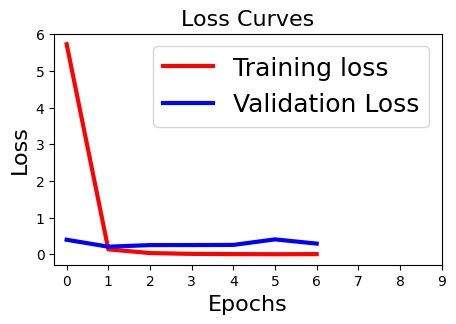

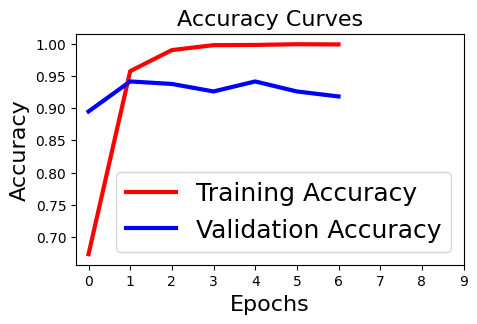

In [49]:
plot_history(history)

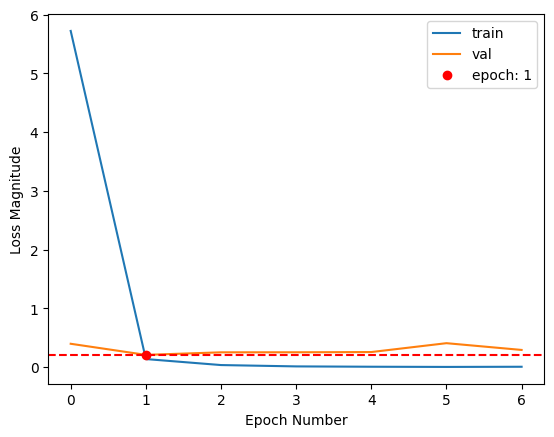

In [50]:
plot_results(history)

In [51]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.20794478058815002, 0.9416342377662659]


#### MobilenetV2 + D512, 224, 128, 10

In [33]:
"""

Uložený model:

Epoch 3: val_loss improved from 0.47013 to 0.41015, saving model to ...MnV2_D512_224_128_10.keras
49/49 [==============================] - 54s 1s/step - loss: 0.0327 - accuracy: 0.9912 - val_loss: 0.4102 - val_accuracy: 0.9261

3/3 [==============================] - 3s 585ms/step - loss: 0.4102 - accuracy: 0.9261
Validation Accuracy: 0.9260700345039368

test loss, test acc: [0.41015031933784485, 0.9260700345039368]

"""

'\n\nUložený model:\n\nEpoch 3: val_loss improved from 0.47013 to 0.41015, saving model to ...MnV2_D512_224_128_10.keras\n49/49 [==============================] - 54s 1s/step - loss: 0.0327 - accuracy: 0.9912 - val_loss: 0.4102 - val_accuracy: 0.9261\n\n3/3 [==============================] - 3s 585ms/step - loss: 0.4102 - accuracy: 0.9261\nValidation Accuracy: 0.9260700345039368\n\ntest loss, test acc: [0.41015031933784485, 0.9260700345039368]\n\n'

In [24]:
current_model_file_name = "MnV2_D512_224_128_10.keras"

IM_size = 224
batch_size = 128
epochs = 10

In [25]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [26]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [27]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 dense_1 (Dense)             (None, 20)                10260     
                                                                 
Total params: 34381396 (131.15 MB)
Trainable params: 32123412 (122.54 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [29]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
19/49 [==========>...................] - ETA: 47s - loss: 17.0479 - accuracy: 0.3644

c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - ETA: 0s - loss: 7.5665 - accuracy: 0.5969
Epoch 1: val_loss improved from inf to 0.51979, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_128_10.keras
49/49 [==============================] - 111s 2s/step - loss: 7.5665 - accuracy: 0.5969 - val_loss: 0.5198 - val_accuracy: 0.9066
Epoch 2/10
49/49 [==============================] - ETA: 0s - loss: 0.2210 - accuracy: 0.9413
Epoch 2: val_loss improved from 0.51979 to 0.47013, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_128_10.keras
49/49 [==============================] - 88s 2s/step - loss: 0.2210 - accuracy: 0.9413 - val_loss: 0.4701 - val_accuracy: 0.9222
Epoch 3/10
49/49 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.9912
Epoch 3: val_loss improved from 0.47013 to 0.41015, saving model to c:\Users\p.kubes\Desktop\pkubes\

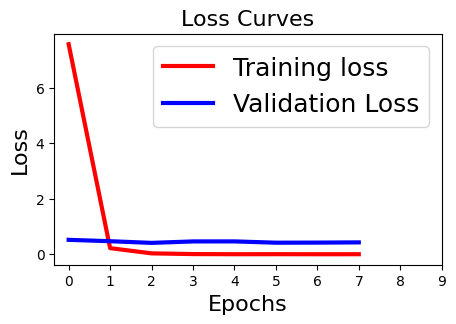

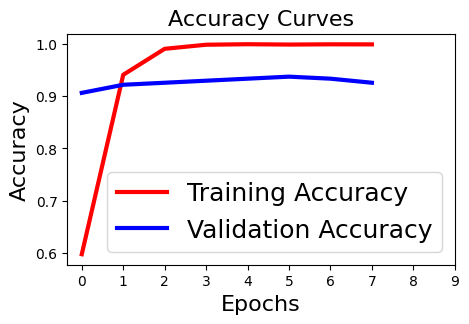

In [30]:
plot_history(history)

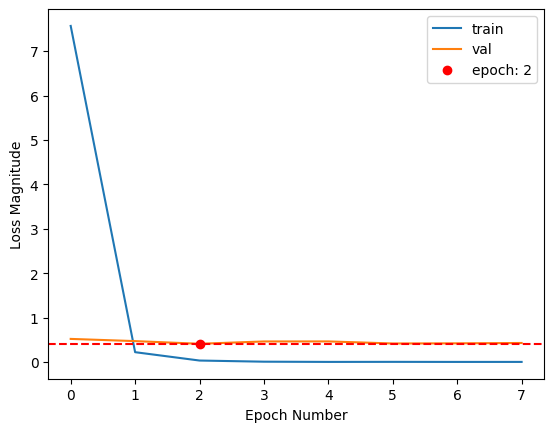

In [31]:
plot_results(history)

In [32]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.41015031933784485, 0.9260700345039368]


#### MobilenetV2 + D512, 224, 32, 10

In [47]:
"""

Uložený model:

Epoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...MnV2_D512_224_32_10.keras
196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144

9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144
Validation Accuracy: 0.9143968820571899

test loss, test acc: [0.4303751289844513, 0.9143968820571899]

"""

'\n\nUložený model:\n\nEpoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...MnV2_D512_224_32_10.keras\n196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144\n\n9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144\nValidation Accuracy: 0.9143968820571899\n\ntest loss, test acc: [0.4303751289844513, 0.9143968820571899]\n\n'

In [36]:
current_model_file_name = "MnV2_D512_224_32_10.keras"

IM_size = 224
batch_size = 32
epochs = 10

In [37]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [38]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [39]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               32113152  
                                                                 
 dense_3 (Dense)             (None, 20)                10260     
                                                                 
Total params: 34381396 (131.15 MB)
Trainable params: 32123412 (122.54 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [41]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
 10/196 [>.............................] - ETA: 1:01 - loss: 28.1539 - accuracy: 0.1562

c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


196/196 [==============================] - ETA: 0s - loss: 3.5629 - accuracy: 0.6854
Epoch 1: val_loss improved from inf to 0.51983, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_32_10.keras
196/196 [==============================] - 78s 389ms/step - loss: 3.5629 - accuracy: 0.6854 - val_loss: 0.5198 - val_accuracy: 0.8794
Epoch 2/10
196/196 [==============================] - ETA: 0s - loss: 0.2248 - accuracy: 0.9349
Epoch 2: val_loss improved from 0.51983 to 0.43038, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_32_10.keras
196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144
Epoch 3/10
196/196 [==============================] - ETA: 0s - loss: 0.1127 - accuracy: 0.9693
Epoch 3: val_loss did not improve from 0.43038
196/196 [==============================]

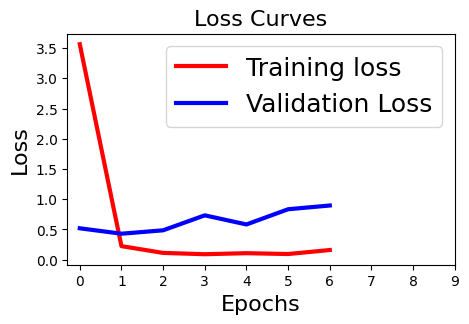

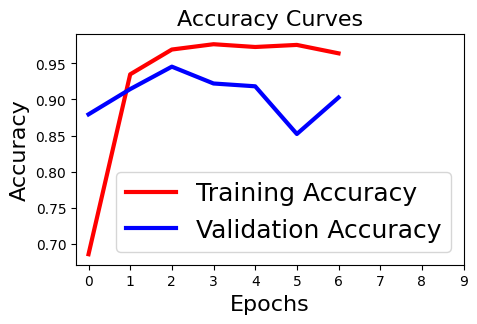

In [42]:
plot_history(history)

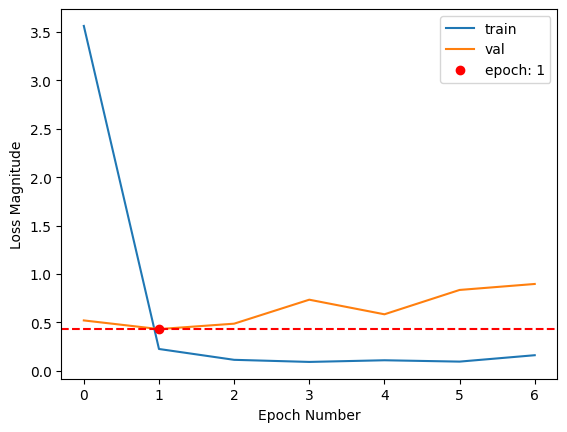

In [43]:
plot_results(history)

In [44]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.4303751289844513, 0.9143968820571899]


#### MobilenetV2 + D256, 224, 64, 10

In [19]:
"""

Uložený model:

Epoch 2: val_loss improved from 0.33767 to 0.26942, saving model to ...MnV2_D256_224_64_10.keras
98/98 [==============================] - 67s 684ms/step - loss: 0.1772 - accuracy: 0.9491 - val_loss: 0.2694 - val_accuracy: 0.9183

5/5 [==============================] - 3s 486ms/step - loss: 0.2694 - accuracy: 0.9183
Validation Accuracy: 0.9182879328727722

test loss, test acc: [0.2694152891635895, 0.9182879328727722]

"""

'\n\n\n\nUložený model:\n\nEpoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...MnV2_D512_224_32_10.keras\n196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144\n\n9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144\nValidation Accuracy: 0.9143968820571899\n\ntest loss, test acc: [0.4303751289844513, 0.9143968820571899]\n\n'

In [1]:
current_model_file_name = "MnV2_D256_224_64_10.keras"

IM_size = 224
batch_size = 64
epochs = 10

In [21]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [22]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [23]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 256)               16056576  
                                                                 
 dense_1 (Dense)             (None, 20)                5140      
                                                                 
Total params: 18319700 (69.88 MB)
Trainable params: 16061716 (61.27 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [25]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
29/98 [=======>......................] - ETA: 47s - loss: 6.7915 - accuracy: 0.4052

c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - ETA: 0s - loss: 2.6207 - accuracy: 0.6520
Epoch 1: val_loss improved from inf to 0.33767, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10.keras
98/98 [==============================] - 73s 714ms/step - loss: 2.6207 - accuracy: 0.6520 - val_loss: 0.3377 - val_accuracy: 0.9105
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 0.1772 - accuracy: 0.9491
Epoch 2: val_loss improved from 0.33767 to 0.26942, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10.keras
98/98 [==============================] - 67s 684ms/step - loss: 0.1772 - accuracy: 0.9491 - val_loss: 0.2694 - val_accuracy: 0.9183
Epoch 3/10
98/98 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9918
Epoch 3: val_loss did not improve from 0.26942
98/98 [==============================] - 70s 718ms/step - loss: 0.0362 - accuracy: 0.9918 - val_lo

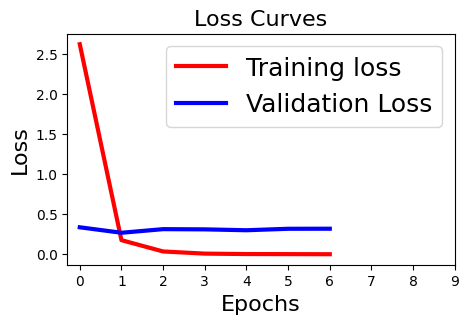

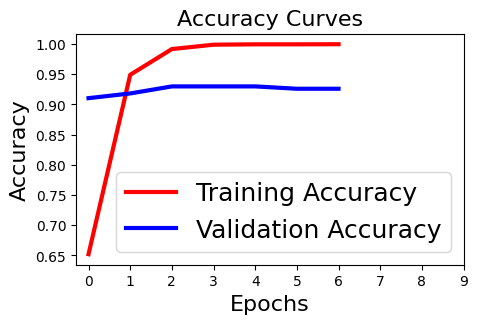

In [26]:
plot_history(history)

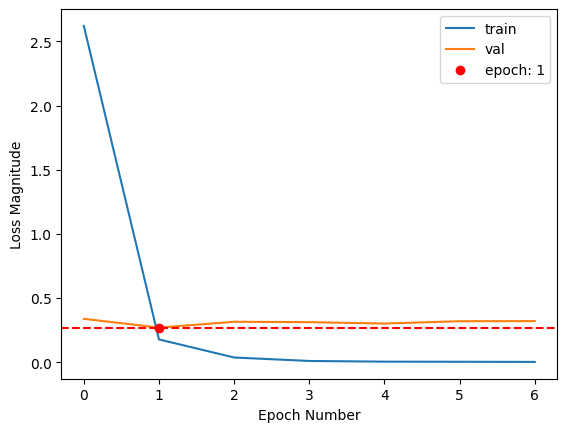

In [27]:
plot_results(history)

In [28]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.2694152891635895, 0.9182879328727722]


#### MobilenetV2 + D256, 224, 128, 10

In [22]:
"""

Uložený model:

Epoch 3: val_loss improved from 0.29961 to 0.27879, saving model to ...MnV2_D256_224_128_10.keras
49/49 [==============================] - 66s 1s/step - loss: 0.0505 - accuracy: 0.9888 - val_loss: 0.2788 - val_accuracy: 0.9339

3/3 [==============================] - 3s 627ms/step - loss: 0.2788 - accuracy: 0.9339
Validation Accuracy: 0.9338521361351013

test loss, test acc: [0.2787910997867584, 0.9338521361351013]

"""

'\n\nUložený model:\n\n\n\nEpoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...MnV2_D512_224_32_10.keras\n196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144\n\n9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144\nValidation Accuracy: 0.9143968820571899\n\ntest loss, test acc: [0.4303751289844513, 0.9143968820571899]\n\n'

In [23]:
current_model_file_name = "MnV2_D256_224_128_10.keras"

IM_size = 224
batch_size = 128
epochs = 10

In [24]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [25]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [26]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 256)               16056576  
                                                                 
 dense_1 (Dense)             (None, 20)                5140      
                                                                 
Total params: 18319700 (69.88 MB)
Trainable params: 16061716 (61.27 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [28]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
15/49 [========>.....................] - ETA: 1:16 - loss: 10.0501 - accuracy: 0.3172

c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


49/49 [==============================] - ETA: 0s - loss: 3.8430 - accuracy: 0.5830
Epoch 1: val_loss improved from inf to 0.43252, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\MnV2_D256_224_128_10.keras
49/49 [==============================] - 111s 2s/step - loss: 3.8430 - accuracy: 0.5830 - val_loss: 0.4325 - val_accuracy: 0.8949
Epoch 2/10
49/49 [==============================] - ETA: 0s - loss: 0.2408 - accuracy: 0.9293
Epoch 2: val_loss improved from 0.43252 to 0.29961, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\MnV2_D256_224_128_10.keras
49/49 [==============================] - 67s 1s/step - loss: 0.2408 - accuracy: 0.9293 - val_loss: 0.2996 - val_accuracy: 0.9183
Epoch 3/10
49/49 [==============================] - ETA: 0s - loss: 0.0505 - accuracy: 0.9888
Epoch 3: val_loss improved from 0.29961 to 0.27879, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\MnV2_D256_22

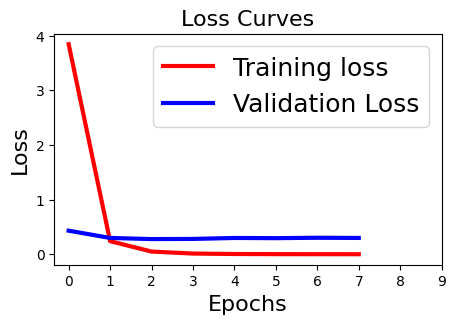

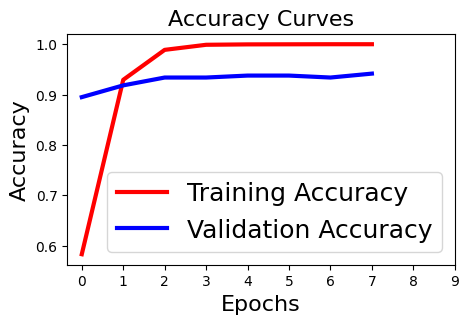

In [29]:
plot_history(history)

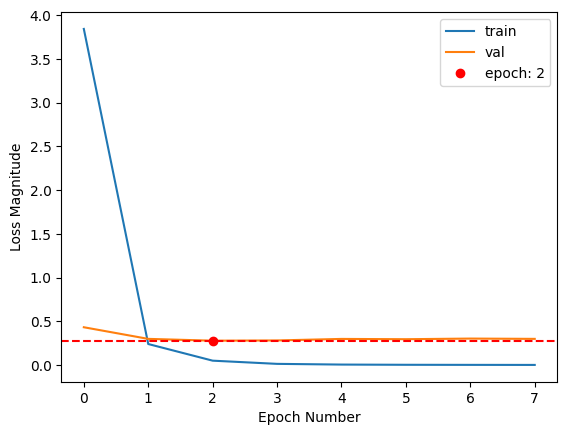

In [30]:
plot_results(history)

In [31]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.2787910997867584, 0.9338521361351013]


#### MobilenetV2 + D256, 224, 32, 10

In [32]:
"""

Uložený model:

Epoch 4: val_loss improved from 0.47175 to 0.41284, saving model to ...Models\MnV2_D256_224_32_10.keras
196/196 [==============================] - 87s 441ms/step - loss: 0.0462 - accuracy: 0.9856 - val_loss: 0.4128 - val_accuracy: 0.8949

9/9 [==============================] - 3s 287ms/step - loss: 0.4128 - accuracy: 0.8949
Validation Accuracy: 0.8949416279792786

test loss, test acc: [0.41283783316612244, 0.8949416279792786]

"""

'\n\nUložený model:\n\n\n\nEpoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...MnV2_D512_224_32_10.keras\n196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144\n\n9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144\nValidation Accuracy: 0.9143968820571899\n\ntest loss, test acc: [0.4303751289844513, 0.9143968820571899]\n\n'

In [33]:
current_model_file_name = "MnV2_D256_224_32_10.keras"

IM_size = 224
batch_size = 32
epochs = 10

In [34]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [35]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [36]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               16056576  
                                                                 
 dense_3 (Dense)             (None, 20)                5140      
                                                                 
Total params: 18319700 (69.88 MB)
Trainable params: 16061716 (61.27 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [38]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
 37/196 [====>.........................] - ETA: 1:02 - loss: 9.2012 - accuracy: 0.3868

c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


196/196 [==============================] - ETA: 0s - loss: 2.5834 - accuracy: 0.6609
Epoch 1: val_loss improved from inf to 0.47175, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\MnV2_D256_224_32_10.keras
196/196 [==============================] - 81s 397ms/step - loss: 2.5834 - accuracy: 0.6609 - val_loss: 0.4717 - val_accuracy: 0.8872
Epoch 2/10
196/196 [==============================] - ETA: 0s - loss: 0.2987 - accuracy: 0.9147
Epoch 2: val_loss did not improve from 0.47175
196/196 [==============================] - 80s 407ms/step - loss: 0.2987 - accuracy: 0.9147 - val_loss: 0.5340 - val_accuracy: 0.9027
Epoch 3/10
196/196 [==============================] - ETA: 0s - loss: 0.0933 - accuracy: 0.9741
Epoch 3: val_loss did not improve from 0.47175
196/196 [==============================] - 80s 407ms/step - loss: 0.0933 - accuracy: 0.9741 - val_loss: 0.5249 - val_accuracy: 0.9105
Epoch 4/10
196/196 [==============================] - ETA: 0s - loss:

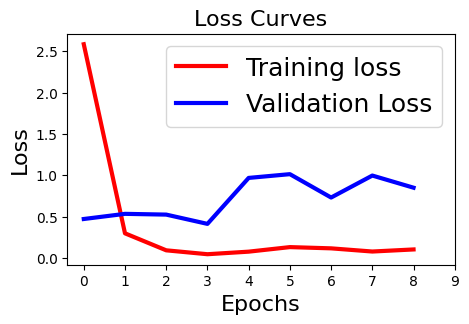

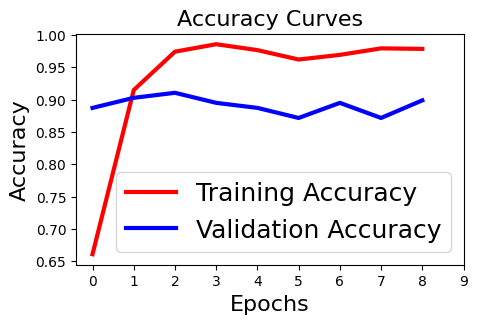

In [39]:
plot_history(history)

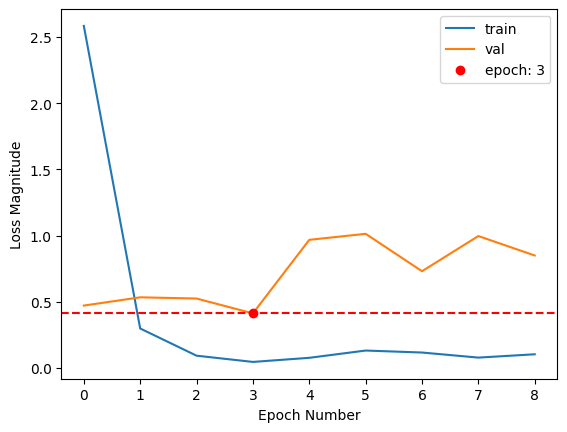

In [40]:
plot_results(history)

In [41]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.41283783316612244, 0.8949416279792786]


#### MobilenetV2 + D512, 224, 64, 10, LR 0.01

In [18]:
"""

Uložený model:

Epoch 6: val_loss improved from 0.93772 to 0.79250, saving model to ...MnV2_D512_224_64_10_LR_0_01.keras
98/98 [==============================] - 108s 1s/step - loss: 1.1446 - accuracy: 0.7119 - val_loss: 0.7925 - val_accuracy: 0.8093

5/5 [==============================] - 4s 469ms/step - loss: 1.1345 - accuracy: 0.7704
Validation Accuracy: 0.7704280018806458

test loss, test acc: [1.1345301866531372, 0.7704280018806458]

"""

'\n\nUložený model:\n\n\n\nEpoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...\n196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144\n\n9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144\nValidation Accuracy: 0.9143968820571899\n\ntest loss, test acc: [0.4303751289844513, 0.9143968820571899]\n\n'

In [19]:
current_model_file_name = "MnV2_D512_224_64_10_LR_0_01.keras"

IM_size = 224
batch_size = 64
epochs = 10

perceptrons_1 = 512
learning_rate = 0.01

In [20]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [21]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [22]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 dense_1 (Dense)             (None, 20)                10260     
                                                                 
Total params: 34381396 (131.15 MB)
Trainable params: 32123412 (122.54 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [24]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
 2/98 [..............................] - ETA: 56s - loss: 146.6401 - accuracy: 0.1094

c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - ETA: 0s - loss: 26.4335 - accuracy: 0.3053
Epoch 1: val_loss improved from inf to 1.86576, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10_LR_0_01.keras
98/98 [==============================] - 62s 613ms/step - loss: 26.4335 - accuracy: 0.3053 - val_loss: 1.8658 - val_accuracy: 0.4086
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 1.9218 - accuracy: 0.4803
Epoch 2: val_loss improved from 1.86576 to 1.33077, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10_LR_0_01.keras
98/98 [==============================] - 60s 609ms/step - loss: 1.9218 - accuracy: 0.4803 - val_loss: 1.3308 - val_accuracy: 0.5759
Epoch 3/10
98/98 [==============================] - ETA: 0s - loss: 1.4395 - accuracy: 0.6046
Epoch 3: val_loss improved from 1.33077 to 0.93772, saving model to c:\Users\p.

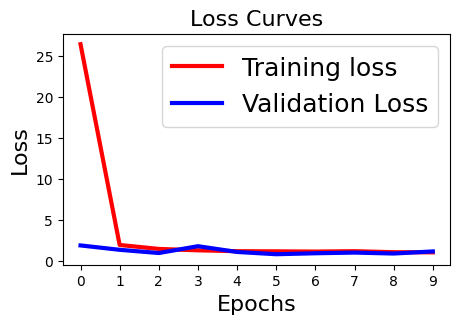

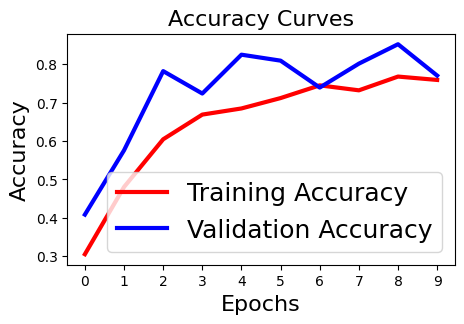

In [25]:
plot_history(history)

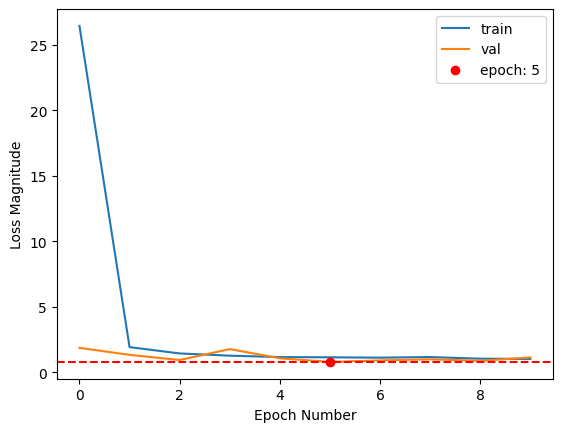

In [26]:
plot_results(history)

In [27]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [1.1345301866531372, 0.7704280018806458]


#### MobilenetV2 + D512, 224, 64, 10, LR 0.005

In [28]:
"""

Uložený model:

Epoch 3: val_loss improved from 0.51565 to 0.50310, saving model to ...MnV2_D512_224_64_10_LR_0_005.keras
98/98 [==============================] - 62s 634ms/step - loss: 0.3615 - accuracy: 0.8944 - val_loss: 0.5031 - val_accuracy: 0.8599

5/5 [==============================] - 2s 375ms/step - loss: 0.5031 - accuracy: 0.8599
Validation Accuracy: 0.8599221706390381

test loss, test acc: [0.5031036734580994, 0.8599221706390381]

"""

'\n\nUložený model:\n\n\n\nEpoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...\n196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144\n\n9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144\nValidation Accuracy: 0.9143968820571899\n\ntest loss, test acc: [0.4303751289844513, 0.9143968820571899]\n\n'

In [29]:
current_model_file_name = "MnV2_D512_224_64_10_LR_0_005.keras"

IM_size = 224
batch_size = 64
epochs = 10

perceptrons_1 = 512
learning_rate = 0.005

In [30]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [31]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [32]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               32113152  
                                                                 
 dense_3 (Dense)             (None, 20)                10260     
                                                                 
Total params: 34381396 (131.15 MB)
Trainable params: 32123412 (122.54 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [34]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10


c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - ETA: 0s - loss: 18.1218 - accuracy: 0.5409
Epoch 1: val_loss improved from inf to 0.57962, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10_LR_0_005.keras
98/98 [==============================] - 65s 630ms/step - loss: 18.1218 - accuracy: 0.5409 - val_loss: 0.5796 - val_accuracy: 0.8366
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 0.6403 - accuracy: 0.8175
Epoch 2: val_loss improved from 0.57962 to 0.51565, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10_LR_0_005.keras
98/98 [==============================] - 61s 625ms/step - loss: 0.6403 - accuracy: 0.8175 - val_loss: 0.5157 - val_accuracy: 0.8599
Epoch 3/10
98/98 [==============================] - ETA: 0s - loss: 0.3615 - accuracy: 0.8944
Epoch 3: val_loss improved from 0.51565 to 0.50310, saving model to c:\Users\

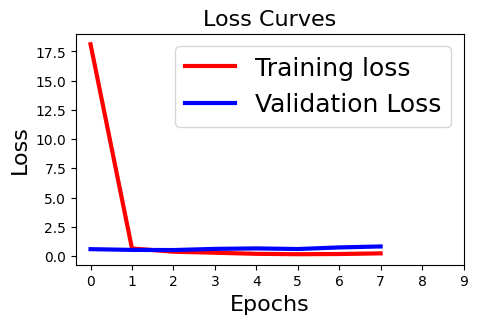

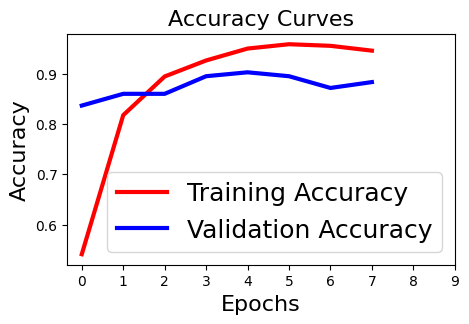

In [35]:
plot_history(history)

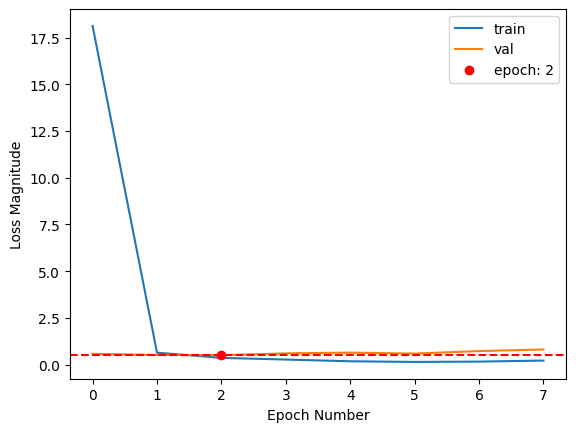

In [36]:
plot_results(history)

In [37]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.5031036734580994, 0.8599221706390381]


#### MobilenetV2 + D512, 224, 64, 10, LR 0.0005

In [38]:
"""

Uložený model:

Epoch 6: val_loss improved from 0.26441 to 0.25945, saving model to ...MnV2_D512_224_64_10_LR_0_0005.keras
98/98 [==============================] - 93s 948ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.2594 - val_accuracy: 0.9416

5/5 [==============================] - 2s 355ms/step - loss: 0.2692 - accuracy: 0.9494
Validation Accuracy: 0.9494163393974304

test loss, test acc: [0.26920196413993835, 0.9494163393974304]

"""

'\n\nUložený model:\n\n\n\nEpoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...\n196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144\n\n9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144\nValidation Accuracy: 0.9143968820571899\n\ntest loss, test acc: [0.4303751289844513, 0.9143968820571899]\n\n'

In [39]:
current_model_file_name = "MnV2_D512_224_64_10_LR_0_0005.keras"

IM_size = 224
batch_size = 64
epochs = 10

perceptrons_1 = 512
learning_rate = 0.0005

In [40]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [41]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [42]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               32113152  
                                                                 
 dense_5 (Dense)             (None, 20)                10260     
                                                                 
Total params: 34381396 (131.15 MB)
Trainable params: 32123412 (122.54 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [44]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
14/98 [===>..........................] - ETA: 48s - loss: 11.1641 - accuracy: 0.3048

c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - ETA: 0s - loss: 2.4382 - accuracy: 0.6879
Epoch 1: val_loss improved from inf to 0.35516, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10_LR_0_0005.keras
98/98 [==============================] - 64s 640ms/step - loss: 2.4382 - accuracy: 0.6879 - val_loss: 0.3552 - val_accuracy: 0.9183
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 0.1094 - accuracy: 0.9702
Epoch 2: val_loss improved from 0.35516 to 0.28350, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10_LR_0_0005.keras
98/98 [==============================] - 63s 645ms/step - loss: 0.1094 - accuracy: 0.9702 - val_loss: 0.2835 - val_accuracy: 0.9300
Epoch 3/10
98/98 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9968
Epoch 3: val_loss did not improve from 0.28350
98/98 [=======================

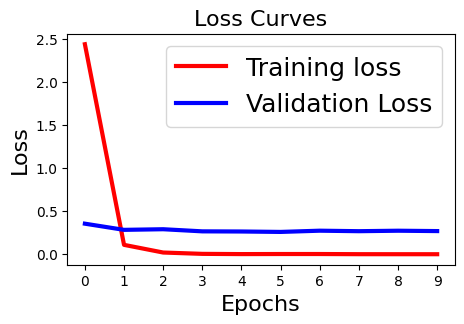

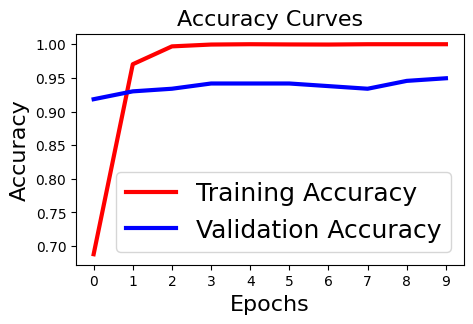

In [45]:
plot_history(history)

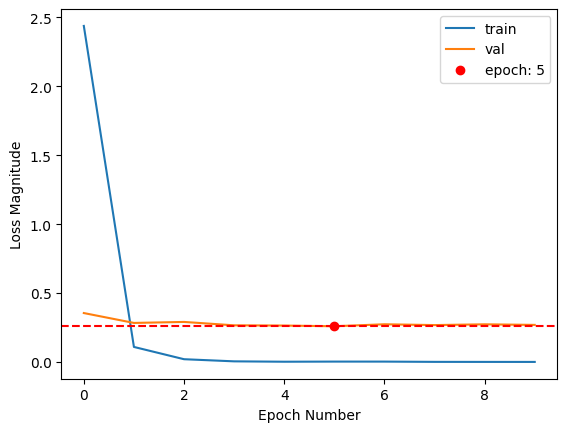

In [46]:
plot_results(history)

In [47]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.26920196413993835, 0.9494163393974304]


#### MobilenetV2 + D512, 224, 64, 10, LR 0.0001

In [48]:
"""

Uložený model:

Epoch 3: val_loss improved from 0.27029 to 0.24116, saving model to ...MnV2_D512_224_64_10_LR_0_0001.keras
98/98 [==============================] - 62s 637ms/step - loss: 0.0085 - accuracy: 0.9994 - val_loss: 0.2412 - val_accuracy: 0.9455

5/5 [==============================] - 2s 351ms/step - loss: 0.2412 - accuracy: 0.9455
Validation Accuracy: 0.9455252885818481

test loss, test acc: [0.2411562204360962, 0.9455252885818481]

"""

'\n\nUložený model:\n\n\n\nEpoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...\n196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144\n\n9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144\nValidation Accuracy: 0.9143968820571899\n\ntest loss, test acc: [0.4303751289844513, 0.9143968820571899]\n\n'

In [49]:
current_model_file_name = "MnV2_D512_224_64_10_LR_0_0001.keras"

IM_size = 224
batch_size = 64
epochs = 10

perceptrons_1 = 512
learning_rate = 0.0001

In [50]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [51]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [52]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_3 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               32113152  
                                                                 
 dense_7 (Dense)             (None, 20)                10260     
                                                                 
Total params: 34381396 (131.15 MB)
Trainable params: 32123412 (122.54 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [54]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
27/98 [=======>......................] - ETA: 43s - loss: 2.0662 - accuracy: 0.5561

c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - ETA: 0s - loss: 1.0433 - accuracy: 0.7425
Epoch 1: val_loss improved from inf to 0.30479, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10_LR_0_0001.keras
98/98 [==============================] - 64s 641ms/step - loss: 1.0433 - accuracy: 0.7425 - val_loss: 0.3048 - val_accuracy: 0.9027
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9845
Epoch 2: val_loss improved from 0.30479 to 0.27029, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D512_224_64_10_LR_0_0001.keras
98/98 [==============================] - 62s 634ms/step - loss: 0.0633 - accuracy: 0.9845 - val_loss: 0.2703 - val_accuracy: 0.9416
Epoch 3/10
98/98 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9994
Epoch 3: val_loss improved from 0.27029 to 0.24116, saving model to c:\Users\

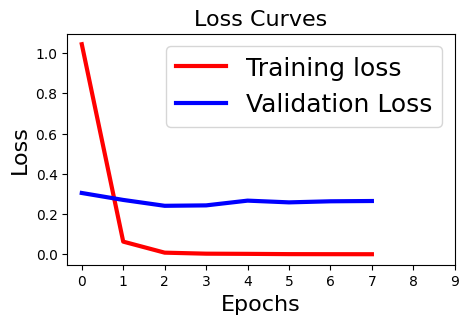

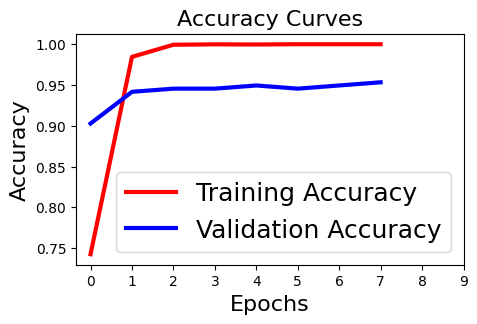

In [55]:
plot_history(history)

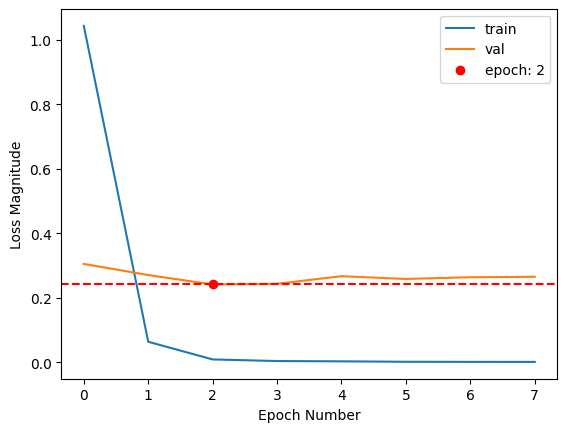

In [56]:
plot_results(history)

In [57]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.2411562204360962, 0.9455252885818481]


#### MobilenetV2 + D1280, 224, 64, 10, LR 0.0005

In [68]:
"""

Uložený model:

Epoch 3: val_loss improved from 0.31333 to 0.25643, saving model to ...MnV2_D1280_224_64_10_LR_0_0005.keras
98/98 [==============================] - 208s 2s/step - loss: 0.0246 - accuracy: 0.9930 - val_loss: 0.2564 - val_accuracy: 0.9455

5/5 [==============================] - 2s 355ms/step - loss: 0.2564 - accuracy: 0.9455
Validation Accuracy: 0.9455252885818481

test loss, test acc: [0.25643447041511536, 0.9455252885818481]

"""

'\n\nUložený model:\n\nEpoch 3: val_loss improved from 0.31333 to 0.25643, saving model to ...MnV2_D1280_224_64_10_LR_0_0005.keras\n98/98 [==============================] - 208s 2s/step - loss: 0.0246 - accuracy: 0.9930 - val_loss: 0.2564 - val_accuracy: 0.9455\n\n5/5 [==============================] - 2s 355ms/step - loss: 0.2564 - accuracy: 0.9455\nValidation Accuracy: 0.9455252885818481\n\ntest loss, test acc: [0.25643447041511536, 0.9455252885818481]\n\n'

In [59]:
current_model_file_name = "MnV2_D1280_224_64_10_LR_0_0005.keras"

IM_size = 224
batch_size = 64
epochs = 10

perceptrons_1 = 1280
learning_rate = 0.0005

In [60]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [61]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [62]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_8 (Dense)             (None, 1280)              80282880  
                                                                 
 dense_9 (Dense)             (None, 20)                25620     
                                                                 
Total params: 82566484 (314.97 MB)
Trainable params: 80308500 (306.35 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [64]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
76/98 [======================>.......] - ETA: 17s - loss: 4.2936 - accuracy: 0.6848

c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - ETA: 0s - loss: 3.4891 - accuracy: 0.7151
Epoch 1: val_loss improved from inf to 0.31333, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D1280_224_64_10_LR_0_0005.keras
98/98 [==============================] - 82s 826ms/step - loss: 3.4891 - accuracy: 0.7151 - val_loss: 0.3133 - val_accuracy: 0.9144
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 0.1124 - accuracy: 0.9664
Epoch 2: val_loss did not improve from 0.31333
98/98 [==============================] - 180s 2s/step - loss: 0.1124 - accuracy: 0.9664 - val_loss: 0.3517 - val_accuracy: 0.9183
Epoch 3/10
98/98 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9930
Epoch 3: val_loss improved from 0.31333 to 0.25643, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\MnV2_D1280_224_64_10_LR_0_0005.keras
98/98 [=======================

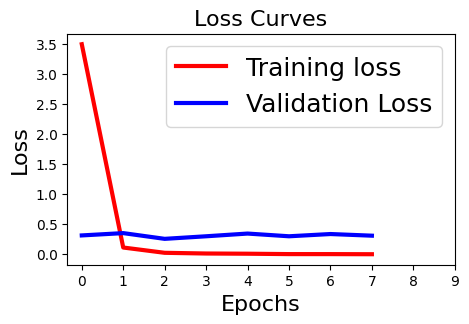

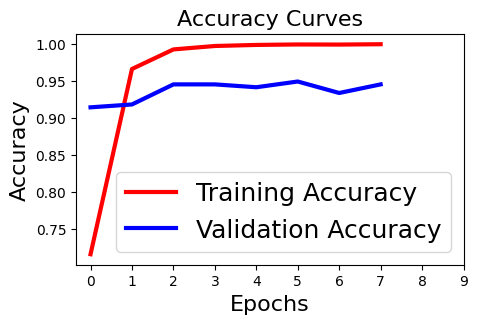

In [65]:
plot_history(history)

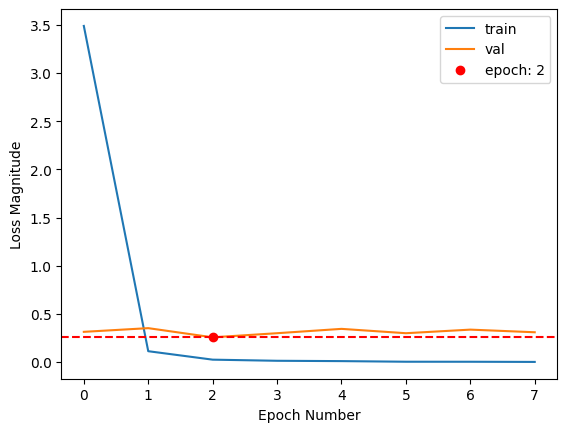

In [66]:
plot_results(history)

In [67]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.25643447041511536, 0.9455252885818481]


#### ResNet152V2 + D512, 224, 64, 10

In [43]:
"""

Uložený model:

Epoch 1: val_loss improved from inf to 0.34744, saving model to ...Rn152V2_D512_224_64_10.keras
98/98 [==============================] - 683s 7s/step - loss: 4.5418 - accuracy: 0.7089 - val_loss: 0.3474 - val_accuracy: 0.9183

5/5 [==============================] - 20s 4s/step - loss: 0.3474 - accuracy: 0.9183
Validation Accuracy: 0.9182879328727722

test loss, test acc: [0.3474411070346832, 0.9182879328727722]

"""

'\n\nUložený model:\n\n\n\nEpoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...MnV2_D512_224_32_10.keras\n196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144\n\n9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144\nValidation Accuracy: 0.9143968820571899\n\ntest loss, test acc: [0.4303751289844513, 0.9143968820571899]\n\n'

In [45]:
current_model_file_name = "Rn152V2_D512_224_64_10.keras"

IM_size = 224
batch_size = 64
epochs = 10

perceptrons_1 = 512
learning_rate = 0.001

In [46]:
# preprocessing function for ResNet, InceptionResNet
def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img

In [47]:
# Define image generators for training and validation
# train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(preprocessing_function=prep_fn)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

# val_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(preprocessing_function=prep_fn)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [49]:
# Load pre-trained model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

234545216/234545216 [==============================] - 207s 1us/step


In [53]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               51380736  
                                                                 
 dense_5 (Dense)             (None, 20)                10260     
                                                                 
Total params: 109722644 (418.56 MB)
Trainable params: 51390996 (196.04 MB)
Non-trainable params: 58331648 (222.52 MB)
_________________________________________________________________


In [55]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
13/98 [==>...........................] - ETA: 7:06 - loss: 22.1420 - accuracy: 0.3461

c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - ETA: 0s - loss: 4.5418 - accuracy: 0.7089
Epoch 1: val_loss improved from inf to 0.34744, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\Rn152V2_D512_224_64_10.keras
98/98 [==============================] - 683s 7s/step - loss: 4.5418 - accuracy: 0.7089 - val_loss: 0.3474 - val_accuracy: 0.9183
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 0.1561 - accuracy: 0.9570
Epoch 2: val_loss did not improve from 0.34744
98/98 [==============================] - 523s 5s/step - loss: 0.1561 - accuracy: 0.9570 - val_loss: 0.4060 - val_accuracy: 0.9222
Epoch 3/10
98/98 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9870
Epoch 3: val_loss did not improve from 0.34744
98/98 [==============================] - 509s 5s/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.5083 - val_accuracy: 0.9339
Epoch 4/10
98/98 [==============================] - ETA: 0s - loss: 0.0538 - accurac

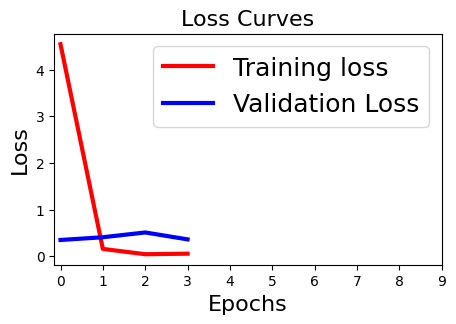

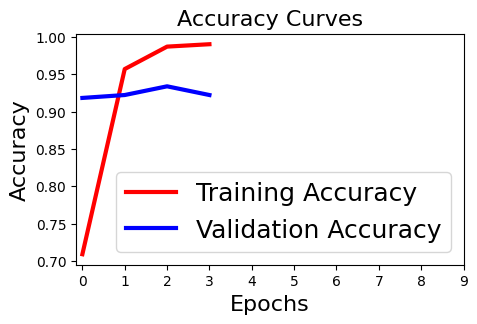

In [59]:
plot_history(history)

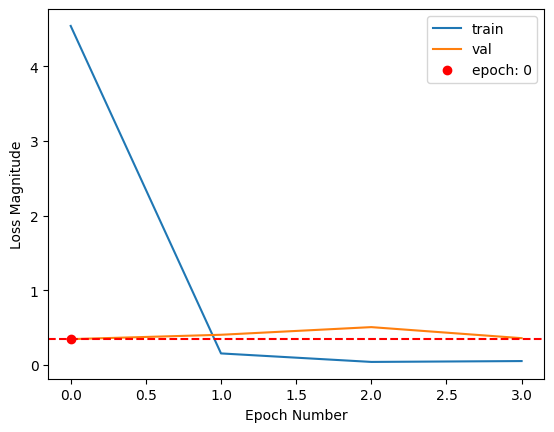

In [60]:
plot_results(history)

In [61]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.3474411070346832, 0.9182879328727722]


#### InceptionResNetV2 + D512, 224, 64, 10

In [73]:
"""

Uložený model:

Epoch 4: val_loss improved from 0.38856 to 0.29200, saving model to ...IncRnV2_D512_224_64_10.keras
98/98 [==============================] - 297s 3s/step - loss: 0.2244 - accuracy: 0.9309 - val_loss: 0.2920 - val_accuracy: 0.9416

5/5 [==============================] - 12s 2s/step - loss: 0.2920 - accuracy: 0.9416
Validation Accuracy: 0.9416342377662659

test loss, test acc: [0.2919991612434387, 0.9416342377662659]

"""

'\n\nUložený model:\n\nEpoch 4: val_loss improved from 0.38856 to 0.29200, saving model to ...IncRnV2_D512_224_64_10.keras\n98/98 [==============================] - 297s 3s/step - loss: 0.2244 - accuracy: 0.9309 - val_loss: 0.2920 - val_accuracy: 0.9416\n\n5/5 [==============================] - 12s 2s/step - loss: 0.2920 - accuracy: 0.9416\nValidation Accuracy: 0.9416342377662659\n\ntest loss, test acc: [0.2919991612434387, 0.9416342377662659]\n\n'

In [63]:
current_model_file_name = "IncRnV2_D512_224_64_10.keras"

IM_size = 224
batch_size = 64
epochs = 10

perceptrons_1 = 512
learning_rate = 0.001

In [64]:
# preprocessing function for ResNet, InceptionResNet
def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img

In [65]:
# Define image generators for training and validation
#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(preprocessing_function=prep_fn)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

#val_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(preprocessing_function=prep_fn)
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [66]:
# Load pre-trained model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

219055592/219055592 [==============================] - 225s 1us/step


In [67]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [68]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 38400)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               19661312  
                                                                 
 dense_7 (Dense)             (None, 20)                10260     
                                                                 
Total params: 74008308 (282.32 MB)
Trainable params: 19671572 (75.04 MB)
Non-trainable params: 54336736 (207.28 MB)
_________________________________________________________________


In [69]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
60/98 [=================>............] - ETA: 1:49 - loss: 10.1002 - accuracy: 0.4701

c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - ETA: 0s - loss: 6.5923 - accuracy: 0.5621
Epoch 1: val_loss improved from inf to 0.52936, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\IncRnV2_D512_224_64_10.keras
98/98 [==============================] - 308s 3s/step - loss: 6.5923 - accuracy: 0.5621 - val_loss: 0.5294 - val_accuracy: 0.8288
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 0.5727 - accuracy: 0.8220
Epoch 2: val_loss improved from 0.52936 to 0.43269, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\IncRnV2_D512_224_64_10.keras
98/98 [==============================] - 297s 3s/step - loss: 0.5727 - accuracy: 0.8220 - val_loss: 0.4327 - val_accuracy: 0.8833
Epoch 3/10
98/98 [==============================] - ETA: 0s - loss: 0.3267 - accuracy: 0.8978
Epoch 3: val_loss improved from 0.43269 to 0.38856, saving model to c:\Users\kubes\Desktop\DataScienceCZ9\Butterflies_Austria_CV\Models\IncRnV2

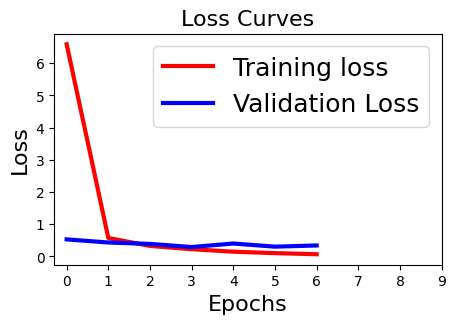

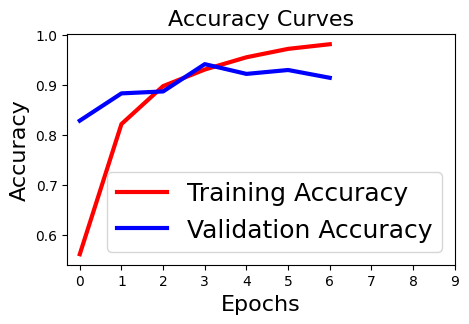

In [70]:
plot_history(history)

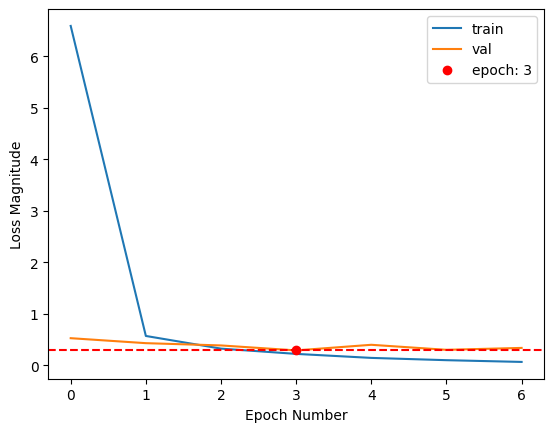

In [71]:
plot_results(history)

In [72]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.2919991612434387, 0.9416342377662659]


 #### InceptionResNetV2 + D512, 224, 256, 10, LR 0.0005 - just prepared

In [ ]:
"""

Uložený model:



Epoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...MnV2_D512_224_32_10.keras
196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144

9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144
Validation Accuracy: 0.9143968820571899

test loss, test acc: [0.4303751289844513, 0.9143968820571899]

"""

In [ ]:
current_model_file_name = "IncRnV2_D512_224_256_10_LR_0_0005.keras"

IM_size = 224
batch_size = 256
epochs = 10

perceptrons_1 = 512
learning_rate = 0.0005

In [ ]:
# preprocessing function for ResNet, InceptionResNet
def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img

In [ ]:
# Define image generators for training and validation
#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
#train_datagen = ImageDataGenerator() # for EfficientNet
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

#val_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
#val_datagen = ImageDataGenerator() # for EfficientNet
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

In [ ]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [ ]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [ ]:
model.summary()

In [ ]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

In [ ]:
plot_history(history)

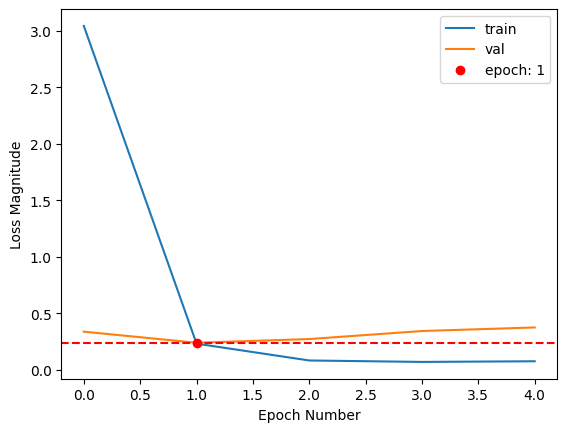

In [40]:
plot_results(history)

In [ ]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

#### EfficientNetB3 + D512, 224, 64, 10

In [20]:
"""

Uložený model:

Epoch 2: val_loss improved from 0.33714 to 0.23913, saving model to ...EnB3_D512_224_64_10.keras
98/98 [==============================] - 337s 3s/step - loss: 0.2312 - accuracy: 0.9400 - val_loss: 0.2391 - val_accuracy: 0.9572

Epoch 5: early stopping
5/5 [==============================] - 7s 1s/step - loss: 0.2391 - accuracy: 0.9572

test loss, test acc: [0.23912906646728516, 0.957198441028595]

"""

'\n\nUložený model:\n\n\n\nEpoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...MnV2_D512_224_32_10.keras\n196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144\n\n9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144\nValidation Accuracy: 0.9143968820571899\n\ntest loss, test acc: [0.4303751289844513, 0.9143968820571899]\n\n'

In [21]:
current_model_file_name = "EnB3_D512_224_64_10.keras"

IM_size = 224
batch_size = 64
epochs = 10

perceptrons_1 = 512
learning_rate = 0.001

In [22]:
# Define image generators for training and validation
#train_datagen = ImageDataGenerator(rescale=1./255)
#train_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
train_datagen = ImageDataGenerator() # for EfficientNet
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

#val_datagen = ImageDataGenerator(rescale=1./255)
#val_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
val_datagen = ImageDataGenerator() # for EfficientNet
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 6252 images belonging to 20 classes.
Found 257 images belonging to 20 classes.


In [23]:
# Load pre-trained model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

43941136/43941136 [==============================] - 3s 0us/step


In [27]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 75264)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               38535680  
                                                                 
 dense_3 (Dense)             (None, 20)                10260     
                                                                 
Total params: 49329475 (188.18 MB)
Trainable params: 38545940 (147.04 MB)
Non-trainable params: 10783535 (41.14 MB)
_________________________________________________________________


In [29]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10


c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 [==============================] - ETA: 0s - loss: 3.0434 - accuracy: 0.7199
Epoch 1: val_loss improved from inf to 0.33714, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\EnB3_D512_224_64_10.keras
98/98 [==============================] - 199s 2s/step - loss: 3.0434 - accuracy: 0.7199 - val_loss: 0.3371 - val_accuracy: 0.8988
Epoch 2/10
98/98 [==============================] - ETA: 0s - loss: 0.2312 - accuracy: 0.9400
Epoch 2: val_loss improved from 0.33714 to 0.23913, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\EnB3_D512_224_64_10.keras
98/98 [==============================] - 337s 3s/step - loss: 0.2312 - accuracy: 0.9400 - val_loss: 0.2391 - val_accuracy: 0.9572
Epoch 3/10
98/98 [==============================] - ETA: 0s - loss: 0.0821 - accuracy: 0.9778
Epoch 3: val_loss did not improve from 0.23913
98/98 [==============================] - 187s 2s/step 

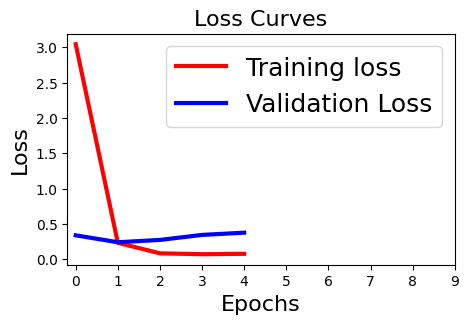

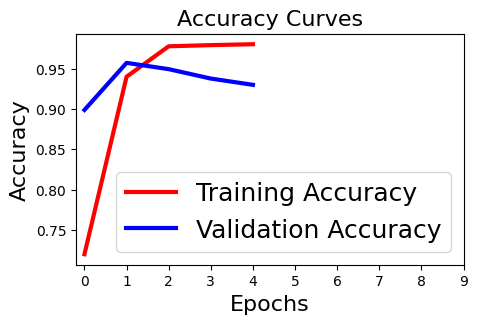

In [30]:
plot_history(history)

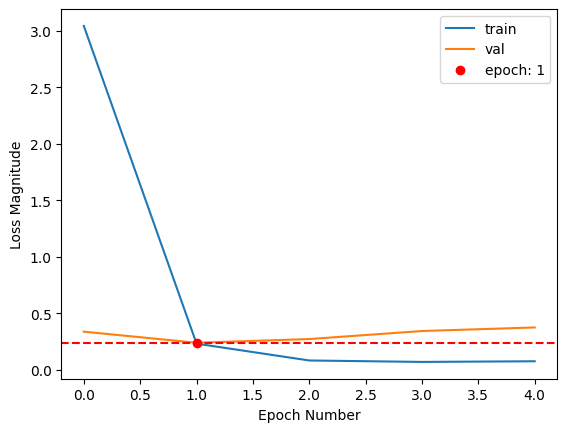

In [31]:
plot_results(history)

In [32]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.23912906646728516, 0.957198441028595]


#### EfficientNetB3 + D512, 224, 256, 10, LR 0.0005 - P dataset

In [40]:
"""

Uložený model:

Epoch 9: val_loss improved from 0.13753 to 0.12807, saving model to ..EnB3_D512_224_256_10_LR_0_0005.keras
25/25 [==============================] - 221s 9s/step - loss: 0.0124 - accuracy: 0.9976 - val_loss: 0.1281 - val_accuracy: 0.9767

2/2 [==============================] - 10s 97ms/step - loss: 0.1392 - accuracy: 0.9689
Validation Accuracy: 0.9688715934753418

test loss, test acc: [0.1392374485731125, 0.9688715934753418]


Uložený model na Preprocessed datasetu:

Epoch 10: val_loss improved from 0.12052 to 0.10213, saving model to ...P_EnB3_D512_224_256_10_LR_0_0005.keras
18/18 [==============================] - 177s 10s/step - loss: 0.0070 - accuracy: 0.9982 - val_loss: 0.1021 - val_accuracy: 0.9783

2/2 [==============================] - 10s 846ms/step - loss: 0.1021 - accuracy: 0.9783
Validation Accuracy: 0.9783393740653992



"""

'\n\nUložený model:\n\nEpoch 9: val_loss improved from 0.13753 to 0.12807, saving model to ..EnB3_D512_224_256_10_LR_0_0005.keras\n25/25 [==============================] - 221s 9s/step - loss: 0.0124 - accuracy: 0.9976 - val_loss: 0.1281 - val_accuracy: 0.9767\n\n2/2 [==============================] - 10s 97ms/step - loss: 0.1392 - accuracy: 0.9689\nValidation Accuracy: 0.9688715934753418\n\ntest loss, test acc: [0.1392374485731125, 0.9688715934753418]\n\n\nUložený model na Preprocessed dataset:\n\n\n\n\n\n\n\n'

In [41]:
current_model_file_name = "P_EnB3_D512_224_256_10_LR_0_0005.keras"

IM_size = 224
batch_size = 256
epochs = 10

perceptrons_1 = 512
learning_rate = 0.0005

In [42]:
# Define image generators for training and validation
#train_datagen = ImageDataGenerator(rescale=1./255)
#train_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
train_datagen = ImageDataGenerator() # for EfficientNet
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

#val_datagen = ImageDataGenerator(rescale=1./255)
#val_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
val_datagen = ImageDataGenerator() # for EfficientNet
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 4474 images belonging to 20 classes.
Found 277 images belonging to 20 classes.


In [43]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [44]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 flatten (Flatten)           (None, 75264)             0         
                                                                 
 dense (Dense)               (None, 512)               38535680  
                                                                 
 dense_1 (Dense)             (None, 20)                10260     
                                                                 
Total params: 49329475 (188.18 MB)
Trainable params: 38545940 (147.04 MB)
Non-trainable params: 10783535 (41.14 MB)
_________________________________________________________________


In [46]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
18/18 [==============================] - ETA: 0s - loss: 4.5208 - accuracy: 0.5760
Epoch 1: val_loss improved from inf to 0.65735, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\P_EnB3_D512_224_256_10_LR_0_0005.keras
18/18 [==============================] - 134s 7s/step - loss: 4.5208 - accuracy: 0.5760 - val_loss: 0.6573 - val_accuracy: 0.8448
Epoch 2/10
18/18 [==============================] - ETA: 0s - loss: 0.3237 - accuracy: 0.9133
Epoch 2: val_loss improved from 0.65735 to 0.29987, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\P_EnB3_D512_224_256_10_LR_0_0005.keras
18/18 [==============================] - 128s 7s/step - loss: 0.3237 - accuracy: 0.9133 - val_loss: 0.2999 - val_accuracy: 0.9242
Epoch 3/10
18/18 [==============================] - ETA: 0s - loss: 0.1066 - accuracy: 0.9705
Epoch 3: val_loss improved from 0.29987 to 0.17433, saving model

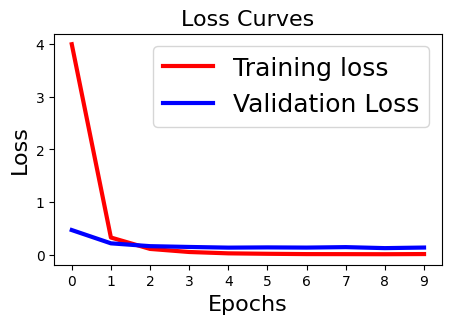

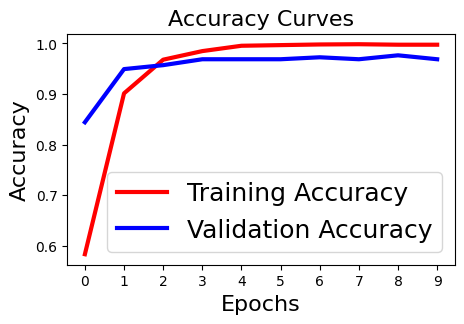

In [49]:
plot_history(history)

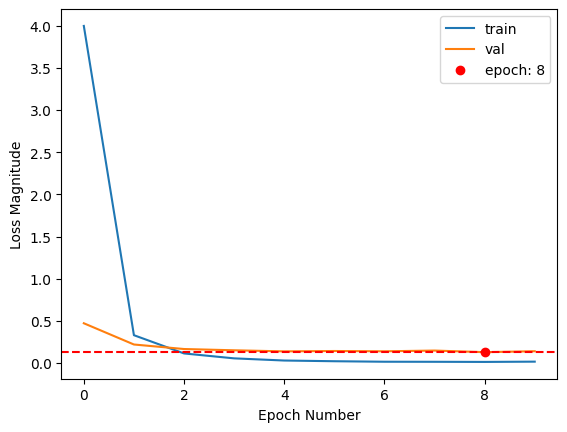

In [50]:
plot_results(history)

In [51]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.1392374485731125, 0.9688715934753418]


#### EfficientNetB3 + D512, 224, 256, 10, LR 0.0001 - P dataset

In [ ]:
"""

Uložený model na Preprocessed datasetu:







"""

In [ ]:
current_model_file_name = "P_EnB3_D512_224_256_10_LR_0_0001.keras"

IM_size = 224
batch_size = 256
epochs = 10

perceptrons_1 = 512
learning_rate = 0.0001

In [ ]:
# Define image generators for training and validation
#train_datagen = ImageDataGenerator(rescale=1./255)
#train_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
train_datagen = ImageDataGenerator() # for EfficientNet
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

#val_datagen = ImageDataGenerator(rescale=1./255)
#val_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
val_datagen = ImageDataGenerator() # for EfficientNet
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

In [ ]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [ ]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [ ]:
model.summary()

In [ ]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

In [ ]:
plot_history(history)

In [ ]:
plot_results(history)

In [ ]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

#### EfficientNetB3 + D1024, 224, 256, 10, LR 0.0005 - P dataset

In [71]:
"""

Uložený model na Preprocessed datasetu:

Epoch 8: val_loss improved from 0.16906 to 0.16570, saving model to ...P_EnB3_D1024_224_256_10_LR_0_0005.keras
18/18 [==============================] - 171s 10s/step - loss: 0.0104 - accuracy: 0.9980 - val_loss: 0.1657 - val_accuracy: 0.9567

2/2 [==============================] - 10s 848ms/step - loss: 0.1671 - accuracy: 0.9567
Validation Accuracy: 0.9566786885261536

test loss, test acc: [0.16707244515419006, 0.9566786885261536]

"""

'\n\nUložený model na Preprocessed datasetu:\n\nEpoch 8: val_loss improved from 0.16906 to 0.16570, saving model to ...P_EnB3_D1024_224_256_10_LR_0_0005.keras\n18/18 [==============================] - 171s 10s/step - loss: 0.0104 - accuracy: 0.9980 - val_loss: 0.1657 - val_accuracy: 0.9567\n\n2/2 [==============================] - 10s 848ms/step - loss: 0.1671 - accuracy: 0.9567\nValidation Accuracy: 0.9566786885261536\n\ntest loss, test acc: [0.16707244515419006, 0.9566786885261536]\n\n'

In [62]:
current_model_file_name = "P_EnB3_D1024_224_256_10_LR_0_0005.keras"

IM_size = 224
batch_size = 256
epochs = 10

perceptrons_1 = 1024
learning_rate = 0.0005

In [63]:
# Define image generators for training and validation
#train_datagen = ImageDataGenerator(rescale=1./255)
#train_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
train_datagen = ImageDataGenerator() # for EfficientNet
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

#val_datagen = ImageDataGenerator(rescale=1./255)
#val_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
val_datagen = ImageDataGenerator() # for EfficientNet
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 4474 images belonging to 20 classes.
Found 277 images belonging to 20 classes.


In [64]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [65]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 75264)             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              77071360  
                                                                 
 dense_5 (Dense)             (None, 20)                20500     
                                                                 
Total params: 87875395 (335.22 MB)
Trainable params: 77091860 (294.08 MB)
Non-trainable params: 10783535 (41.14 MB)
_________________________________________________________________


In [67]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
18/18 [==============================] - ETA: 0s - loss: 7.2890 - accuracy: 0.5476
Epoch 1: val_loss improved from inf to 0.81670, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\P_EnB3_D1024_224_256_10_LR_0_0005.keras
18/18 [==============================] - 149s 8s/step - loss: 7.2890 - accuracy: 0.5476 - val_loss: 0.8167 - val_accuracy: 0.8303
Epoch 2/10
18/18 [==============================] - ETA: 0s - loss: 0.3923 - accuracy: 0.9068
Epoch 2: val_loss improved from 0.81670 to 0.25062, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\P_EnB3_D1024_224_256_10_LR_0_0005.keras
18/18 [==============================] - 139s 8s/step - loss: 0.3923 - accuracy: 0.9068 - val_loss: 0.2506 - val_accuracy: 0.9170
Epoch 3/10
18/18 [==============================] - ETA: 0s - loss: 0.1006 - accuracy: 0.9745
Epoch 3: val_loss improved from 0.25062 to 0.19431, saving mod

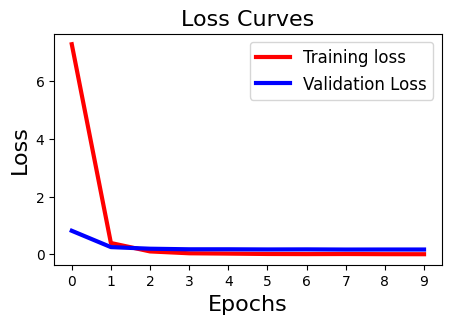

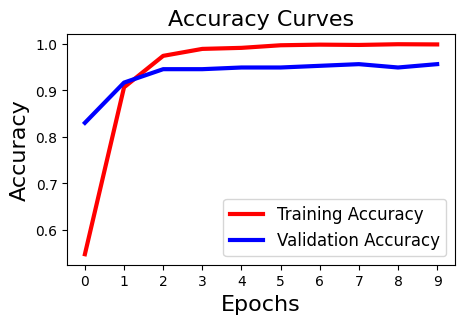

In [68]:
plot_history(history)

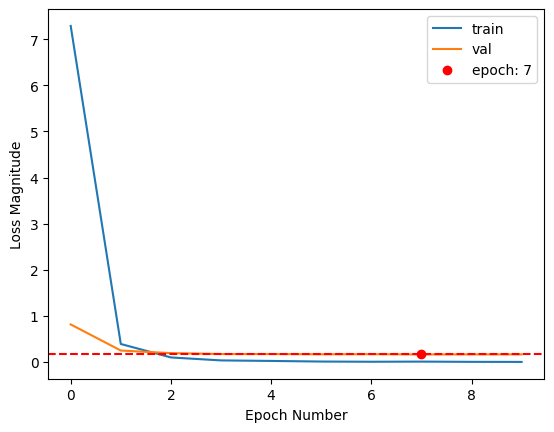

In [69]:
plot_results(history)

In [70]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.16707244515419006, 0.9566786885261536]


#### EfficientNetB4 + D512, 224, 256, 10, LR 0.0005 - P dataset

In [48]:
"""

Uložený model na Preprocessed datasetu:

Epoch 7: val_loss improved from 0.27541 to 0.25214, saving model to P_EnB4_D512_224_256_10_LR_0.0005.keras
18/18 [==============================] - 283s 15s/step - loss: 0.0166 - accuracy: 0.9955 - val_loss: 0.2521 - val_accuracy: 0.9567

2/2 [==============================] - 12s 1s/step - loss: 0.2595 - accuracy: 0.9495
Validation Accuracy: 0.9494584798812866

test loss, test acc: [0.2595466077327728, 0.9494584798812866]

"""

'\n\nUložený model na Preprocessed datasetu:\n\n\n\n'

In [49]:
current_model_file_name = "P_EnB4_D512_224_256_10_LR_0.0005.keras"

IM_size = 224
batch_size = 256
epochs = 10

perceptrons_1 = 512
learning_rate = 0.0005

In [50]:
# Define image generators for training and validation
#train_datagen = ImageDataGenerator(rescale=1./255)
#train_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
train_datagen = ImageDataGenerator() # for EfficientNet
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

#val_datagen = ImageDataGenerator(rescale=1./255)
#val_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
val_datagen = ImageDataGenerator() # for EfficientNet
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 4474 images belonging to 20 classes.
Found 277 images belonging to 20 classes.


In [51]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

71686520/71686520 [==============================] - 4s 0us/step


In [52]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 7, 7, 1792)        17673823  
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 87808)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               44958208  
                                                                 
 dense_3 (Dense)             (None, 20)                10260     
                                                                 
Total params: 62642291 (238.96 MB)
Trainable params: 44968468 (171.54 MB)
Non-trainable params: 17673823 (67.42 MB)
_________________________________________________________________


In [54]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/10
18/18 [==============================] - ETA: 0s - loss: 4.3360 - accuracy: 0.5646
Epoch 1: val_loss improved from inf to 0.61013, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\EnB4_D512_224_256_10_LR_0.0005.keras
18/18 [==============================] - 187s 10s/step - loss: 4.3360 - accuracy: 0.5646 - val_loss: 0.6101 - val_accuracy: 0.8123
Epoch 2/10
18/18 [==============================] - ETA: 0s - loss: 0.3625 - accuracy: 0.9075 
Epoch 2: val_loss improved from 0.61013 to 0.33271, saving model to c:\Users\p.kubes\Desktop\pkubes\DataScienceCZ9\pythonProjects\Butterflies_Austria_CV\Models\EnB4_D512_224_256_10_LR_0.0005.keras
18/18 [==============================] - 202s 11s/step - loss: 0.3625 - accuracy: 0.9075 - val_loss: 0.3327 - val_accuracy: 0.9170
Epoch 3/10
18/18 [==============================] - ETA: 0s - loss: 0.0992 - accuracy: 0.9718 
Epoch 3: val_loss improved from 0.33271 to 0.28574, saving model

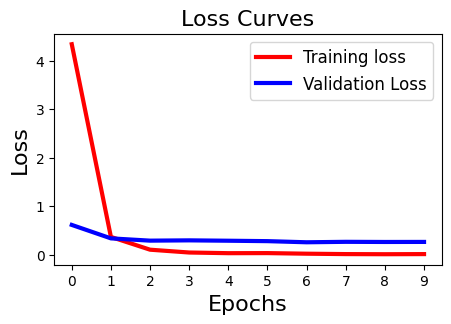

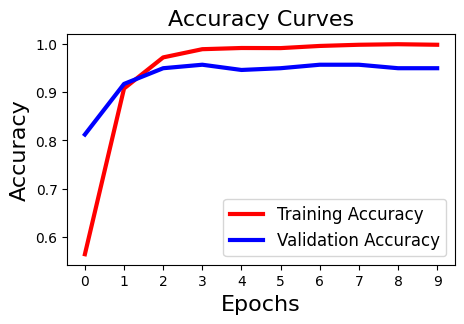

In [59]:
plot_history(history)

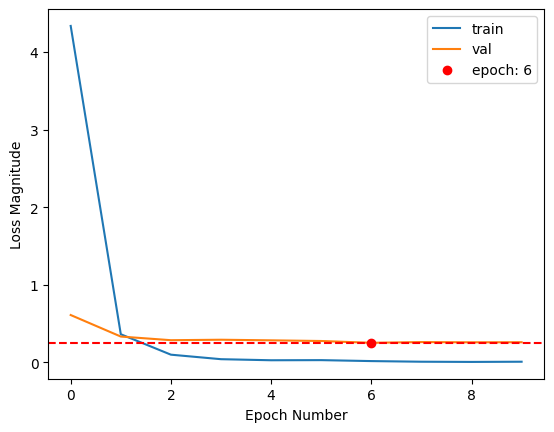

In [60]:
plot_results(history)

In [57]:
# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

test loss, test acc: [0.2595466077327728, 0.9494584798812866]


#### Next model

#### Other model

#### New model blueprint Copy, Paste & Split

In [ ]:
"""

Uložený model:



Epoch 2: val_loss improved from 0.51983 to 0.43038, saving model to ...MnV2_D512_224_32_10.keras
196/196 [==============================] - 78s 396ms/step - loss: 0.2248 - accuracy: 0.9349 - val_loss: 0.4304 - val_accuracy: 0.9144

9/9 [==============================] - 3s 305ms/step - loss: 0.4304 - accuracy: 0.9144
Validation Accuracy: 0.9143968820571899

test loss, test acc: [0.4303751289844513, 0.9143968820571899]

"""

current_model_file_name = "MnV2_D512_224_64_10.keras"

IM_size = 224
batch_size = 64
epochs = 10

perceptrons_1 = 512
learning_rate = 0.001

# preprocessing function for ResNet, InceptionResNet
def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img

# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
#train_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
#train_datagen = ImageDataGenerator() # for EfficientNet
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
#val_datagen = ImageDataGenerator(preprocessing_function=prep_fn) # ResNet, InceptionResNet
#val_datagen = ImageDataGenerator() # for EfficientNet
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = ResNet152V2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

# freeze base model
base_model.trainable = False

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=True,
    mode="min",
    restore_best_weights=True
)

# Saving model via ModelCheckpoint
checkpoint_filepath = os.path.join(current_working_directory, "Models", current_model_file_name)
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1,
)

model.summary()

# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=epochs,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      callbacks=[early_stopping, model_checkpoint_callback]
      #,class_weight=class_weights
      )

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

plot_history(history)

plot_results(history)

# evaluation -> loss, acc (from keras)
test_eval = model.evaluate(val_generator, verbose=0)
print(f'test loss, test acc: {test_eval}')

## Best model

In [72]:
best_model_file_name = os.path.join(current_working_directory, "Models", "P_EnB3_D512_224_256_10_LR_0_0005.keras")

IM_size = 224
batch_size = 256
epochs = 10

perceptrons_1 = 512
learning_rate = 0.0005 #default 0.001

In [73]:
# Define image generators for training and validation
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(IM_size, IM_size),
        batch_size=batch_size,
        class_mode='categorical')

Found 4474 images belonging to 20 classes.
Found 277 images belonging to 20 classes.


In [74]:
# Load pre-trained VGG16 model without the top (fully connected) layers
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
#base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(IM_size, IM_size, 3))

In [75]:
# freeze base model
base_model.trainable = False

# Build the model on top of the base model
best_model = Sequential([
    base_model,
    Flatten(),
    Dense(perceptrons_1, activation='relu'),
    Dense(20, activation='softmax')
])

# Compile the model with Adam optimizer
best_model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
best_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 7, 7, 1536)        10783535  
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 75264)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               38535680  
                                                                 
 dense_7 (Dense)             (None, 20)                10260     
                                                                 
Total params: 49329475 (188.18 MB)
Trainable params: 38545940 (147.04 MB)
Non-trainable params: 10783535 (41.14 MB)
_________________________________________________________________


In [77]:
best_model.load_weights(os.path.join(current_working_directory, "Models", best_model_file_name))

In [78]:
# evaluation -> loss, acc (from keras)
test_eval = best_model.evaluate(val_generator, verbose=0)
print(f"test loss: {round(test_eval[0], 4)} , test accuracy: {round(test_eval[1], 4)}")

test loss: 0.1021 , test accuracy: 0.9783


### Confusion matrix

In [79]:
# get all images and labels in iterations
val_images = []
val_labels = []

for i in range( val_generator.__len__() ):
    val_images.extend(val_generator.__getitem__( i )[0])
    val_labels.extend(val_generator.__getitem__( i )[1])

val_images = np.array(val_images)

In [80]:
# get predictions
model_labels = best_model.predict(val_images)

9/9 [==============================] - 8s 726ms/step


In [81]:
pred_labels = np.argmax(model_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
class_list = list(class_indices.keys())

In [82]:
class_indices_cnames = {dfcz[dfcz['abk'] == k]['cname'].values[0]: v for k, v in class_indices.items()}
class_indices_cnames

{'Babočka admirál': 0,
 'Bělásek řeřichový': 1,
 'Jasoň červenooký': 2,
 'Modráskovití': 3,
 'Babočka bílé C': 4,
 'Babočka bodláková': 5,
 'Ohniváček celíkový': 6,
 'Babočka kopřivová': 7,
 'Perleťovec stříbropásek': 8,
 'Bělásek řepový': 9,
 'Okáč luční': 10,
 'Pestrokřídlec podražcový': 11,
 'Žluťásek barvoměnný': 12,
 'Okáč bojínkový': 13,
 'Batolec duhový': 14,
 'Otakárek ovocný': 15,
 'Otakárek fenyklový': 16,
 'Babočka paví oko': 17,
 'Babočka osiková': 18,
 'Žluťásek řešetlákový': 19}

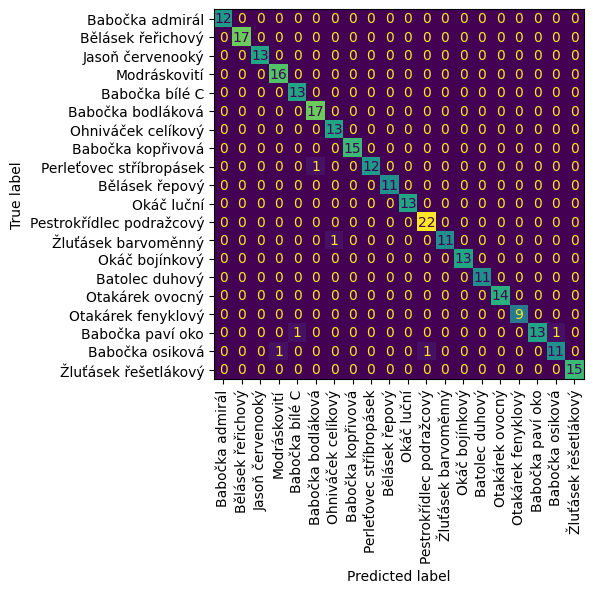

In [131]:
# confusion matrix
cm = confusion_matrix(true_labels.tolist(), pred_labels.tolist())
ConfusionMatrixDisplay(cm, display_labels=class_indices_cnames).plot(include_values=True, colorbar=False, values_format = ".0f", xticks_rotation="vertical", cmap="viridis")
plt.show()

### Show wrong predictions

In [84]:
# Functions for display images
def get_cz_class_name(pred):
  label = class_names[pred]
  return dfcz[dfcz['abk'] == label]["cname"].values[0]

def display_images_grid_nparray(images_np, titles_im):
  # images_np is array of selected images
  # titles is list of titles selected images
  cols = 5 # Number of columns in grid
  # Calculate the number of rows needed
  rows = len(images_np) // cols + (len(images_np) % cols > 0)
  fig, axes = plt.subplots(rows, cols, figsize=(10, round(rows * 2.5)))
  for i, ax in enumerate(axes.flat):
      if i < len(images_np):
          # ax.imshow(images_np[i], cmap='gray') # rescaled data models
          ax.imshow(images_np[i]/255, cmap='gray') # w/o scaling data models
          ax.set_title(titles_im[i], fontsize = 8)
          ax.axis('off')
      else:
          ax.axis('off')
  plt.tight_layout()
  plt.show()

Number of false predictions: 6



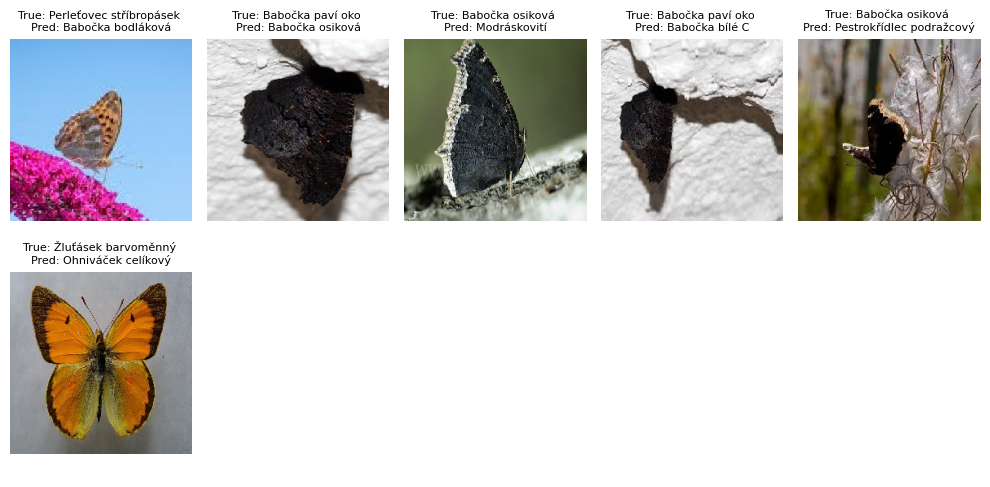

In [85]:
# display false prediction image
count_false_pred = 0
images_np = np.empty((0, IM_size, IM_size, 3), dtype=np.uint8)
titles_im = np.empty((0))
for i in range(len(true_labels)):
  if true_labels[i] != pred_labels[i]:
    count_false_pred += 1
    images_np = np.append(images_np, np.expand_dims(val_images[i], axis=0), axis=0)
    true_name = get_cz_class_name(true_labels[i])
    pred_name = get_cz_class_name(pred_labels[i])
    titles_im = np.append(titles_im, (f"True: {true_name} \nPred: {pred_name}"))

print(f"Number of false predictions: {count_false_pred}\n")
display_images_grid_nparray(images_np, titles_im)

## Other


In [ ]:
model.predict()

In [ ]:
# prediction -> confusion matrix (custom function)
predictions = model.predict(val_generator, verbose=0)

In [ ]:
val_images, val_labels = next(val_generator)
pred_labels = model.predict(val_images)

In [ ]:
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

def display_images(images, true_labels, pred_labels, class_names, num_images=9):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]
        plt.title(f"True: {true_labels[i]} {true_label}\nPred: {pred_labels[i]} {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    
display_images(val_images, true_labels, pred_labels, class_names, num_images=9)

In [ ]:
true_labels